<a href="https://colab.research.google.com/github/varunkr24/Machine-Learning/blob/Python/BM_clustering_preprocessing_model_pipeline_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import pyodbc
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from kmodes.kmodes import KModes
from datetime import date
import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [ ]:
# # #Loading the data from model table in SQL Server

# sql_conn = pyodbc.connect("DSN=CNPPEDW05")

# sql = "select * from EDW.DTCStage.SKB001_BM_FinalModelData"

# df = pd.read_sql(sql, sql_conn)

# df.shape

In [ ]:
# df.to_csv('BM_Call_Routing_ModelingData_11_10_2021.csv',index=False)

In [ ]:
df = pd.read_csv('BM_Call_Routing_ModelingData_11_10_2021.csv')
df.shape

(2374105, 152)

In [ ]:
pd.to_datetime(df['LeadDate']).min()

Timestamp('2019-06-01 00:00:00')

In [ ]:
pd.to_datetime(df['LeadDate']).max()

Timestamp('2021-11-05 00:00:00')

In [ ]:
df.head()

,LeadID,BorrowerDimID,CampaignID,CRMID,LeadDate,CallTimeType,TriggerDate,LeadSourceId,FirstName,LastName,HomePhone,WorkPhone,MobilePhone,PrimaryPhone,FilterName,FilterRoutingID,PrimaryEmail,DesiredLoanPurpose,DesiredNewLoanAmount,LendingTreeTrackingNumber,PropertyAddress,PropertyAddress2,PropertyCity,PropertyCounty,PropertyState,PropertyZipCode,SocialSecurityNumber,DateofBirth,CreatedOn,LeadSource,UnpaidPrincipalBalance,MailingState,CurrentPropertyValue,PropertyUse,PropertyPurchasePrice,TargetCashoutAmount,AssignedCreditValue,SelfCreditRating,Bankruptcy,Foreclosure,LoanRequestType,DownPayment,SecondMortgageBalance,PresentLTV,PresentCLTV,ProposedLTV,ProposedCLTV,RequestType,EmploymentStatus,ResidenceType,IsWorkingWithAgent,IsFoundHome,IsFHAEligible,IsVALoan,IsMilitary,IsSFXSystem,IsPrimaryEmailValid,CustomerRegistryID,ISExistingCustomerRelationship,ServicingLoanNumber,CustomerPhoneNumber,CallStartDateTime,calls_LoanNumSrvcr,OriginatingContactID,IsLCConversation,IsAnswered,MktgLeadType,CustomerType,CampaignSourceType,CampaignCategory,LeadFact_CampaignName,LoanNumSrvcr,XferFlag,LCConversation,CreditInqFlag,InitialLockDate,LockFlag,STUFlag,CCSAgentName,CCSAgentID,LCName,LCID,LCTeam,PropState,CreditOrderDate,STUDate,FundFlag,FundDate,contactflag,Min_LockDt,Min_CreditDt,Min_STUDt,Min_FundDt,Row_Nbr,Lock,Infutor,Phone Type,Demographic Level,Penetration Range Other Occupation,Penetration Range Blue Collar,Penetration Range White Collar,Median Years of School,Percent Range Automobile Owner,Mail Order Respondent,Median House Value,Percent Range MFDU,Percentage Range SFDU,Percent Range Asian Speaking,Percentage Range Spanish Speaking,Percent Range English Speaking,Percent Range Asian,Percent Range Hispanic,Percent Range White,Percent Range Black,Home Market Value,Median Year Built,Marital Status,Dwelling Type,Estimated Household Income,Wealth Score,Homeowner,Length of Residence,Age_INF,Gender,Mortgage Term,Mortgage Deed Type,Mortgage Type,Mortgage Amount,Loan To Value,Sale Type,Last Assessment Year,Deed Type,Tax Year,Tax Amount,Number of Bathrooms,Living Squarefeet,Square foot type indicator,Land Squarefeet,Year Built,Improvement Value Indicator,Number of Stories in Building,Number of Buildings,Property Type Indicator,Residential Based,Absentee Owner Indicator,Land Use code,Mortgage Due Date,Mortgage Date,Recording Date,ReferenceNumber,ID Verify Score,RecordNum
0,500707,1208461,783,00Q3m000012HVklEAG,2021-06-19,Off Hours,2021-06-18 00:00:00.000,2.0,Adrian,Kanten,7.632490e+09,NaN,NaN,7.632490e+09,LF Refi $125k+ Rate/Term 680+,894918.0,NaN,REFIPRIMARY,130000.0,577566856,MN 55434,NaN,MINNEAPOLIS,ANOKA,MN,55434,468029320.0,1972-09-29,2021-06-18 21:47:10.777,Lending Tree,130000.0,MN,325000.0,OWNEROCCUPIED,325000.0,NaN,779.0,EXCELLENT,NEVER,NEVER,REFINANCE,NaN,0.0,40.0000,40.0000,40.0000,40.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,5037708,False,NaN,7.632490e+09,2021-09-07 15:33:40.000,NaN,1.657690e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Infutor,W,1.0,N,T,H,143.0,C,G,D,NaN,A,NaN,NaN,C,T,S,D,S,H,1921.0,M,S,F,NaN,H,7.0,52.0,M,20.0,MG,CNV,167600.0,50.0,1.0,2019.0,G,2019.0,307078.0,300.0,2065.0,L,10325.0,1981.0,M,100.0,1.0,10.0,Y,O,163.0,2036-06-01,2016-05-23,2005-08-26,1208461,79,1
1,408375,1112077,783,00Q3l00000xzAryEAE,2021-02-01,Business Hours,2021-02-01 00:00:00.000,2.0,John,Anderson,9.132549e+09,NaN,NaN,9.132549e+09,LF Refi $125k+ Rate/Term 680+,894918.0,NaN,REFIPRIMARY,150000.0,571571704,KS 66062,NaN,OLATHE,JOHNSON,KS,66062,441701945.0,1968-03-01,2021-02-01 10:19:24.893,Lending Tree,150000.0,KS,275000.0,OWNEROCCUPIED,275000.0,NaN,769.0,EXCELLENT,NEVER,NEVER,REFINANCE,NaN,0.0,54.5455,54.5455,54.5455,54.5455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,4760766,False,NaN,9.132549e+09,2021-02-01 10:19:28.000,NaN,1.336405e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Infutor,L,1.0,L,S,J,1

In [ ]:
df['LeadID'].nunique()

249291

In [ ]:
df['LeadDate'].min(), df['LeadDate'].max()

('2019-06-01', '2021-11-05')

In [ ]:
df = df[df['LeadDate'] >= '2020-01-01']
df.shape

(2249076, 152)

In [ ]:
df.shape

(2249076, 152)

In [ ]:
df['LeadDate'].min(), df['LeadDate'].max()

('2020-01-01', '2021-11-05')

In [ ]:
df['LeadID'].nunique()

187921

In [ ]:
df.head()

,LeadID,BorrowerDimID,CampaignID,CRMID,LeadDate,CallTimeType,TriggerDate,LeadSourceId,FirstName,LastName,HomePhone,WorkPhone,MobilePhone,PrimaryPhone,FilterName,FilterRoutingID,PrimaryEmail,DesiredLoanPurpose,DesiredNewLoanAmount,LendingTreeTrackingNumber,PropertyAddress,PropertyAddress2,PropertyCity,PropertyCounty,PropertyState,PropertyZipCode,SocialSecurityNumber,DateofBirth,CreatedOn,LeadSource,UnpaidPrincipalBalance,MailingState,CurrentPropertyValue,PropertyUse,PropertyPurchasePrice,TargetCashoutAmount,AssignedCreditValue,SelfCreditRating,Bankruptcy,Foreclosure,LoanRequestType,DownPayment,SecondMortgageBalance,PresentLTV,PresentCLTV,ProposedLTV,ProposedCLTV,RequestType,EmploymentStatus,ResidenceType,IsWorkingWithAgent,IsFoundHome,IsFHAEligible,IsVALoan,IsMilitary,IsSFXSystem,IsPrimaryEmailValid,CustomerRegistryID,ISExistingCustomerRelationship,ServicingLoanNumber,CustomerPhoneNumber,CallStartDateTime,calls_LoanNumSrvcr,OriginatingContactID,IsLCConversation,IsAnswered,MktgLeadType,CustomerType,CampaignSourceType,CampaignCategory,LeadFact_CampaignName,LoanNumSrvcr,XferFlag,LCConversation,CreditInqFlag,InitialLockDate,LockFlag,STUFlag,CCSAgentName,CCSAgentID,LCName,LCID,LCTeam,PropState,CreditOrderDate,STUDate,FundFlag,FundDate,contactflag,Min_LockDt,Min_CreditDt,Min_STUDt,Min_FundDt,Row_Nbr,Lock,Infutor,Phone Type,Demographic Level,Penetration Range Other Occupation,Penetration Range Blue Collar,Penetration Range White Collar,Median Years of School,Percent Range Automobile Owner,Mail Order Respondent,Median House Value,Percent Range MFDU,Percentage Range SFDU,Percent Range Asian Speaking,Percentage Range Spanish Speaking,Percent Range English Speaking,Percent Range Asian,Percent Range Hispanic,Percent Range White,Percent Range Black,Home Market Value,Median Year Built,Marital Status,Dwelling Type,Estimated Household Income,Wealth Score,Homeowner,Length of Residence,Age_INF,Gender,Mortgage Term,Mortgage Deed Type,Mortgage Type,Mortgage Amount,Loan To Value,Sale Type,Last Assessment Year,Deed Type,Tax Year,Tax Amount,Number of Bathrooms,Living Squarefeet,Square foot type indicator,Land Squarefeet,Year Built,Improvement Value Indicator,Number of Stories in Building,Number of Buildings,Property Type Indicator,Residential Based,Absentee Owner Indicator,Land Use code,Mortgage Due Date,Mortgage Date,Recording Date,ReferenceNumber,ID Verify Score,RecordNum
0,500707,1208461,783,00Q3m000012HVklEAG,2021-06-19,Off Hours,2021-06-18 00:00:00.000,2.0,Adrian,Kanten,7.632490e+09,NaN,NaN,7.632490e+09,LF Refi $125k+ Rate/Term 680+,894918.0,NaN,REFIPRIMARY,130000.0,577566856,MN 55434,NaN,MINNEAPOLIS,ANOKA,MN,55434,468029320.0,1972-09-29,2021-06-18 21:47:10.777,Lending Tree,130000.0,MN,325000.0,OWNEROCCUPIED,325000.0,NaN,779.0,EXCELLENT,NEVER,NEVER,REFINANCE,NaN,0.0,40.0000,40.0000,40.0000,40.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,5037708,False,NaN,7.632490e+09,2021-09-07 15:33:40.000,NaN,1.657690e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Infutor,W,1.0,N,T,H,143.0,C,G,D,NaN,A,NaN,NaN,C,T,S,D,S,H,1921.0,M,S,F,NaN,H,7.0,52.0,M,20.0,MG,CNV,167600.0,50.0,1.0,2019.0,G,2019.0,307078.0,300.0,2065.0,L,10325.0,1981.0,M,100.0,1.0,10.0,Y,O,163.0,2036-06-01,2016-05-23,2005-08-26,1208461,79,1
1,408375,1112077,783,00Q3l00000xzAryEAE,2021-02-01,Business Hours,2021-02-01 00:00:00.000,2.0,John,Anderson,9.132549e+09,NaN,NaN,9.132549e+09,LF Refi $125k+ Rate/Term 680+,894918.0,NaN,REFIPRIMARY,150000.0,571571704,KS 66062,NaN,OLATHE,JOHNSON,KS,66062,441701945.0,1968-03-01,2021-02-01 10:19:24.893,Lending Tree,150000.0,KS,275000.0,OWNEROCCUPIED,275000.0,NaN,769.0,EXCELLENT,NEVER,NEVER,REFINANCE,NaN,0.0,54.5455,54.5455,54.5455,54.5455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,4760766,False,NaN,9.132549e+09,2021-02-01 10:19:28.000,NaN,1.336405e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Infutor,L,1.0,L,S,J,1

In [ ]:
df[['Mortgage Term','Living Squarefeet','Mortgage Date']].head()

,Mortgage Term,Living Squarefeet,Mortgage Date
0,20.0,2065.0,2016-05-23
1,30.0,1791.0,2020-07-23
2,30.0,2256.0,2003-11-20
3,30.0,1381.0,2017-08-24
4,30.0,1661.0,2018-07-20


In [ ]:
df[['Mortgage Term','Living Squarefeet','Mortgage Date']].nunique()

Mortgage Term          41
Living Squarefeet    5549
Mortgage Date        6494
dtype: int64

In [ ]:
df['Mortgage Term'].min()

1.0

In [ ]:
df[['Mortgage Term','Living Squarefeet','Mortgage Date']].isnull().sum()

Mortgage Term        659371
Living Squarefeet    407706
Mortgage Date        560989
dtype: int64

In [ ]:
df[['Mortgage Term','Living Squarefeet','Mortgage Date']].isnull().mean()*100

Mortgage Term        29.317417
Living Squarefeet    18.127711
Mortgage Date        24.943088
dtype: float64

In [ ]:
df.head()

,LeadID,BorrowerDimID,CampaignID,CRMID,LeadDate,CallTimeType,TriggerDate,LeadSourceId,FirstName,LastName,HomePhone,WorkPhone,MobilePhone,PrimaryPhone,FilterName,FilterRoutingID,PrimaryEmail,DesiredLoanPurpose,DesiredNewLoanAmount,LendingTreeTrackingNumber,PropertyAddress,PropertyAddress2,PropertyCity,PropertyCounty,PropertyState,PropertyZipCode,SocialSecurityNumber,DateofBirth,CreatedOn,LeadSource,UnpaidPrincipalBalance,MailingState,CurrentPropertyValue,PropertyUse,PropertyPurchasePrice,TargetCashoutAmount,AssignedCreditValue,SelfCreditRating,Bankruptcy,Foreclosure,LoanRequestType,DownPayment,SecondMortgageBalance,PresentLTV,PresentCLTV,ProposedLTV,ProposedCLTV,RequestType,EmploymentStatus,ResidenceType,IsWorkingWithAgent,IsFoundHome,IsFHAEligible,IsVALoan,IsMilitary,IsSFXSystem,IsPrimaryEmailValid,CustomerRegistryID,ISExistingCustomerRelationship,ServicingLoanNumber,CustomerPhoneNumber,CallStartDateTime,calls_LoanNumSrvcr,OriginatingContactID,IsLCConversation,IsAnswered,MktgLeadType,CustomerType,CampaignSourceType,CampaignCategory,LeadFact_CampaignName,LoanNumSrvcr,XferFlag,LCConversation,CreditInqFlag,InitialLockDate,LockFlag,STUFlag,CCSAgentName,CCSAgentID,LCName,LCID,LCTeam,PropState,CreditOrderDate,STUDate,FundFlag,FundDate,contactflag,Min_LockDt,Min_CreditDt,Min_STUDt,Min_FundDt,Row_Nbr,Lock,Infutor,Phone Type,Demographic Level,Penetration Range Other Occupation,Penetration Range Blue Collar,Penetration Range White Collar,Median Years of School,Percent Range Automobile Owner,Mail Order Respondent,Median House Value,Percent Range MFDU,Percentage Range SFDU,Percent Range Asian Speaking,Percentage Range Spanish Speaking,Percent Range English Speaking,Percent Range Asian,Percent Range Hispanic,Percent Range White,Percent Range Black,Home Market Value,Median Year Built,Marital Status,Dwelling Type,Estimated Household Income,Wealth Score,Homeowner,Length of Residence,Age_INF,Gender,Mortgage Term,Mortgage Deed Type,Mortgage Type,Mortgage Amount,Loan To Value,Sale Type,Last Assessment Year,Deed Type,Tax Year,Tax Amount,Number of Bathrooms,Living Squarefeet,Square foot type indicator,Land Squarefeet,Year Built,Improvement Value Indicator,Number of Stories in Building,Number of Buildings,Property Type Indicator,Residential Based,Absentee Owner Indicator,Land Use code,Mortgage Due Date,Mortgage Date,Recording Date,ReferenceNumber,ID Verify Score,RecordNum
0,500707,1208461,783,00Q3m000012HVklEAG,2021-06-19,Off Hours,2021-06-18 00:00:00.000,2.0,Adrian,Kanten,7.632490e+09,NaN,NaN,7.632490e+09,LF Refi $125k+ Rate/Term 680+,894918.0,NaN,REFIPRIMARY,130000.0,577566856,MN 55434,NaN,MINNEAPOLIS,ANOKA,MN,55434,468029320.0,1972-09-29,2021-06-18 21:47:10.777,Lending Tree,130000.0,MN,325000.0,OWNEROCCUPIED,325000.0,NaN,779.0,EXCELLENT,NEVER,NEVER,REFINANCE,NaN,0.0,40.0000,40.0000,40.0000,40.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,5037708,False,NaN,7.632490e+09,2021-09-07 15:33:40.000,NaN,1.657690e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Infutor,W,1.0,N,T,H,143.0,C,G,D,NaN,A,NaN,NaN,C,T,S,D,S,H,1921.0,M,S,F,NaN,H,7.0,52.0,M,20.0,MG,CNV,167600.0,50.0,1.0,2019.0,G,2019.0,307078.0,300.0,2065.0,L,10325.0,1981.0,M,100.0,1.0,10.0,Y,O,163.0,2036-06-01,2016-05-23,2005-08-26,1208461,79,1
1,408375,1112077,783,00Q3l00000xzAryEAE,2021-02-01,Business Hours,2021-02-01 00:00:00.000,2.0,John,Anderson,9.132549e+09,NaN,NaN,9.132549e+09,LF Refi $125k+ Rate/Term 680+,894918.0,NaN,REFIPRIMARY,150000.0,571571704,KS 66062,NaN,OLATHE,JOHNSON,KS,66062,441701945.0,1968-03-01,2021-02-01 10:19:24.893,Lending Tree,150000.0,KS,275000.0,OWNEROCCUPIED,275000.0,NaN,769.0,EXCELLENT,NEVER,NEVER,REFINANCE,NaN,0.0,54.5455,54.5455,54.5455,54.5455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1,4760766,False,NaN,9.132549e+09,2021-02-01 10:19:28.000,NaN,1.336405e+11,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Infutor,L,1.0,L,S,J,1

In [ ]:
original_cols= ['LeadID','ID Verify Score', 'Mortgage Deed Type', 'Mortgage Type',
       'Penetration Range Blue Collar', 'Penetration Range Other Occupation',
       'Penetration Range White Collar', 'Percent Range Automobile Owner',
       'Home Market Value', 'Dwelling Type', 'Estimated Household Income',
       'Loan To Value', 'Land Squarefeet', 'Improvement Value Indicator',
       'Property Type Indicator', 'Absentee Owner Indicator',
       'Square foot type indicator', 'Wealth Score', 'Year Built',
       'DesiredNewLoanAmount', 'CurrentPropertyValue',
       'LoanRequestType', 'IsMilitary', 'SelfCreditRating',
       'UnpaidPrincipalBalance', 'Mortgage Amount','Mortgage Term','Living Squarefeet','LeadDate','Mortgage Date']
len(original_cols)

30

In [ ]:
final_model_cols= ['LeadID','ID Verify Score', 'Mortgage Deed Type', 'Mortgage Type',
       'Penetration Range Blue Collar', 'Penetration Range Other Occupation',
       'Penetration Range White Collar', 'Percent Range Automobile Owner',
       'Home Market Value', 'Dwelling Type', 'Estimated Household Income',
       'Loan To Value', 'Land Squarefeet', 'Improvement Value Indicator',
       'Property Type Indicator', 'Absentee Owner Indicator',
       'Square foot type indicator', 'Wealth Score', 'Year Built',
       'DesiredNewLoanAmount', 'CurrentPropertyValue',
       'LoanRequestType', 'IsMilitary', 'SelfCreditRating',
       'UnpaidPrincipalBalance', 'Mortgage Amount','Mortgage Term','Living Squarefeet','Mortgage Age']
len(final_model_cols)

29

In [ ]:
df1 = df[original_cols].drop_duplicates()
df1.shape

(187921, 30)

In [ ]:
df2 = df[['LeadID','Lock']]
df2 = df2.replace(np.nan, 0)
df2 = df2.drop_duplicates()
df2.shape

(190895, 2)

In [ ]:
df1_lock = df2.groupby('LeadID').agg({'Lock':'sum'}).reset_index()
df1_lock.shape

(187921, 2)

In [ ]:
df = pd.merge(df1, df1_lock, how='inner', on = 'LeadID')
df.shape

(187921, 31)

In [ ]:
df = df[original_cols]
df.shape

(187921, 30)

In [ ]:
df.to_csv('BM_Clustering_Data_for_call_routing_11_18_21.csv',index=False)

In [ ]:
df = pd.read_csv('BM_Clustering_Data_for_call_routing_11_18_21.csv')
df.shape

(187921, 30)

In [ ]:
df = df.replace(np.NaN,'')
df.head()

,LeadID,ID Verify Score,Mortgage Deed Type,Mortgage Type,Penetration Range Blue Collar,Penetration Range Other Occupation,Penetration Range White Collar,Percent Range Automobile Owner,Home Market Value,Dwelling Type,Estimated Household Income,Loan To Value,Land Squarefeet,Improvement Value Indicator,Property Type Indicator,Absentee Owner Indicator,Square foot type indicator,Wealth Score,Year Built,DesiredNewLoanAmount,CurrentPropertyValue,LoanRequestType,IsMilitary,SelfCreditRating,UnpaidPrincipalBalance,Mortgage Amount,Mortgage Term,Living Squarefeet,LeadDate,Mortgage Date
0,500707,79,MG,CNV,T,N,H,C,H,S,F,50,10325,M,10,O,L,,1981,130000,325000,REFINANCE,False,EXCELLENT,130000,167600,20,2065,2021-06-19,2016-05-23
1,408375,79,MG,CNV,S,L,J,J,,M,E,61,9126,P,10,O,L,,1996,150000,275000,REFINANCE,False,EXCELLENT,150000,161600,30,1791,2021-02-01,2020-07-23
2,394686,72,,CNV,,,M,A,M,S,H,82,47480,A,10,O,L,G,1980,160000,350000,REFINANCE,False,SOMECREDITPROBLEMS,160000,239000,30,2256,2021-01-16,2003-11-20
3,238278,81,TR,CNV,S,N,I,A,E,S,G,59,44,A,11,O,L,E,1985,270000,300000,Refinance,False,Excellent,270000,164500,30,1381,2020-05-20,2017-08-24
4,387004,69,MG,CNV,R,I,N,A,G,S,C,90,25265,M,10,O,L,F,1986,140000,250000,REFINANCE,False,EXCELLENT,140000,156000,30,1661,2021-01-07,2018-07-20


In [ ]:
test_data = df
test_data.shape

(187921, 30)

In [ ]:
test_data.head()

,LeadID,ID Verify Score,Mortgage Deed Type,Mortgage Type,Penetration Range Blue Collar,Penetration Range Other Occupation,Penetration Range White Collar,Percent Range Automobile Owner,Home Market Value,Dwelling Type,Estimated Household Income,Loan To Value,Land Squarefeet,Improvement Value Indicator,Property Type Indicator,Absentee Owner Indicator,Square foot type indicator,Wealth Score,Year Built,DesiredNewLoanAmount,CurrentPropertyValue,LoanRequestType,IsMilitary,SelfCreditRating,UnpaidPrincipalBalance,Mortgage Amount,Mortgage Term,Living Squarefeet,LeadDate,Mortgage Date
0,500707,79,MG,CNV,T,N,H,C,H,S,F,50,10325,M,10,O,L,,1981,130000,325000,REFINANCE,False,EXCELLENT,130000,167600,20,2065,2021-06-19,2016-05-23
1,408375,79,MG,CNV,S,L,J,J,,M,E,61,9126,P,10,O,L,,1996,150000,275000,REFINANCE,False,EXCELLENT,150000,161600,30,1791,2021-02-01,2020-07-23
2,394686,72,,CNV,,,M,A,M,S,H,82,47480,A,10,O,L,G,1980,160000,350000,REFINANCE,False,SOMECREDITPROBLEMS,160000,239000,30,2256,2021-01-16,2003-11-20
3,238278,81,TR,CNV,S,N,I,A,E,S,G,59,44,A,11,O,L,E,1985,270000,300000,Refinance,False,Excellent,270000,164500,30,1381,2020-05-20,2017-08-24
4,387004,69,MG,CNV,R,I,N,A,G,S,C,90,25265,M,10,O,L,F,1986,140000,250000,REFINANCE,False,EXCELLENT,140000,156000,30,1661,2021-01-07,2018-07-20


In [ ]:
# Numerical Variables
num_cols = ['Loan To Value',
            'Land Squarefeet',
            'DesiredNewLoanAmount',
            'CurrentPropertyValue',
            'UnpaidPrincipalBalance',
            'Mortgage Amount',
            'Mortgage Term',
            'Living Squarefeet',
            'Year Built']

In [ ]:
# Categorical Variables
cat_cols = ['Mortgage Deed Type',
            'Mortgage Type',
            'Penetration Range Blue Collar',
            'Penetration Range Other Occupation',
            'Penetration Range White Collar',
            'Percent Range Automobile Owner',
            'Home Market Value',
            'Dwelling Type',
            'Estimated Household Income',
            'Improvement Value Indicator',
            'Property Type Indicator',
            'Absentee Owner Indicator',
            'Square foot type indicator',
            'Wealth Score',
            'LoanRequestType',
            'IsMilitary',
            'SelfCreditRating',
            'Mortgage Age']

In [ ]:
# Range Variables
range_cols = ['Penetration Range White Collar',
              'Percent Range Automobile Owner',
              'Penetration Range Blue Collar',
              'Penetration Range Other Occupation']

In [ ]:
# Wealth and Income Variables
wealth_income_cols = ['Wealth Score',
                      'Estimated Household Income']

In [ ]:
# For Mortgage age
def year_fun(x):
    if np.floor(x/365)< 1:
        return '< 1'
    elif np.floor(x/365) < 3:
        return '1-3 yrs'
    elif np.floor(x/365) < 6:
        return '3-5 yrs'
    else:
        return '5+'


In [ ]:
class ColumnTypeChange_Imputation(BaseEstimator, TransformerMixin):
    
    def __init__(self, num_cols, cat_cols, LeadDate, MortgageDate):
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.LeadDate = LeadDate
        self.MortgageDate = MortgageDate
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X[self.num_cols] = X[self.num_cols].replace('',np.NaN).astype('float64')
        X['Mortgage Age'] = ((pd.to_datetime(X[self.LeadDate]) - pd.to_datetime(X[self.MortgageDate])).dt.days).apply(year_fun)
        X[self.cat_cols] = X[self.cat_cols].replace('','UNKNOWN').apply(lambda x: x.astype(str).str.upper()).astype('object')
        return X

In [ ]:
# All Categorical variables pre-processing functions
def Preprocess_HomeMarketValue(x):

    low_home_market_value = ['A','B','C','D','E']
    low_med_home_market_value = ['F','G','H','I','J']
    high_med_home_market_value = ['K','L','M','N','O']
    high_home_market_value = ['P','Q','R','S']

    if x in low_home_market_value:
        return 'LOW'
    elif x in low_med_home_market_value:
        return 'LOW_MED'
    elif x in high_med_home_market_value:
        return 'HIGH_MED'
    elif x in high_home_market_value:
        return 'HIGH'
    else:
        return 'UNKNOWN'

# Pre-processing Range Variables
def Preprocess_Range(x):

    low_range = ['P','Q','R','S','T']
    low_med_range = ['K','L','M','N','O']
    high_med_range = ['F','G','H','I','J']
    high_range = ['A','B','C','D','E']

    if x in low_range:
        return 'LOW'
    elif x in low_med_range:
        return 'LOW_MED'
    elif x in high_med_range:
        return 'HIGH_MED'
    elif x in high_range:
        return 'HIGH'
    else:
        return 'UNKNOWN'

# Pre-processing Wealth and Income Variables
def Preprocess_WealthIncome(x):

    low_wealth_income = ['A','B']
    low_med_wealth_income = ['C','D']
    high_med_wealth_income = ['E','F']
    high_wealth_income = ['G','H']

    if x in low_wealth_income:
        return 'LOW'
    elif x in low_med_wealth_income:
        return 'LOW_MED'
    elif x in high_med_wealth_income:
        return 'HIGH_MED'
    elif x in high_wealth_income:
        return 'HIGH'
    else:
        return 'UNKNOWN'

# Pre-processing MortgageDeedType
def Preprocess_MortgageDeedType(x):

    mortgage_deed_type_others = ['EQ','RV','RD','CD','AP','CL','TD','IM','T','AI','DP','TL']
    mortgage_deed_type_high_freq = ['TR','MG','SE','MO']

    if x in mortgage_deed_type_others:
        return 'OTHERS'
    elif x in mortgage_deed_type_high_freq :
        return x
    else:
        return 'UNKNOWN'

# Pre-processing MortgageType
def Preprocess_MortgageType(x):

    mortgage_type_PP_SBA = ['PP','SBA']
    mortgage_type_CNV_FHA_VA = ['CNV','FHA','VA']

    if x in mortgage_type_PP_SBA:
        return 'PP or SBA'
    elif x in mortgage_type_CNV_FHA_VA:
        return x
    else:
        return 'UNKNOWN'

# Pre-processing AbsenteeOwnerIndicator
def Preprocess_AbsenteeOwnerIndicator(x):

    absentee_owner_indicator_T_M = ['T','M']
    absentee_owner_indicator_O_A_S = ['O','A','S']

    if x in absentee_owner_indicator_T_M:
        return 'T or M'
    elif x in absentee_owner_indicator_O_A_S:
        return x
    else:
        return 'UNKNOWN'



# Pre-processing SelfCreditRating
def Preprocess_SelfCreditRating(x):

    self_credit_rating_excellent = 'EXCELLENT'
    self_credit_rating_some_credit_problems = 'SOMECREDITPROBLEMS'
    self_credit_rating_good_little = ['GOOD','LITTLEORNOCREDITHISTORY']
    self_credit_rating_major_credit_problems = 'MAJORCREDITPROBLEMS'

    if x in self_credit_rating_excellent:
        return 'EXCELLENT'
    elif x in self_credit_rating_some_credit_problems:
        return 'SOMECREDITPROBLEMS'
    elif x in self_credit_rating_good_little:
        return x
    elif x in self_credit_rating_major_credit_problems:
        return 'MAJORCREDITPROBLEMS'
    else:
        return 'UNKNOWN'

# Pre-processing SquareFootTypeIndicator
def Preprocess_SquareFootTypeIndicator(x):

    square_foot_type_indicator_others = ['A','G','M','H','R']
    square_foot_type_indicator_high_freq = ['L','B']

    if x in square_foot_type_indicator_others:
        return 'OTHERS'
    elif x in square_foot_type_indicator_high_freq :
        return x
    else:
        return 'UNKNOWN'

# Pre-processing PropertyTypeIndicator
def Preprocess_PropertyTypeIndicator(x):

    try:
        if float(x) == 10:
            return '10'
        elif float(x) > 10:
            return 'ABOVE_10'
    except:
        return 'UNKNOWN'


In [ ]:
df.head()

,LeadID,ID Verify Score,Mortgage Deed Type,Mortgage Type,Penetration Range Blue Collar,Penetration Range Other Occupation,Penetration Range White Collar,Percent Range Automobile Owner,Home Market Value,Dwelling Type,Estimated Household Income,Loan To Value,Land Squarefeet,Improvement Value Indicator,Property Type Indicator,Absentee Owner Indicator,Square foot type indicator,Wealth Score,Year Built,DesiredNewLoanAmount,CurrentPropertyValue,LoanRequestType,IsMilitary,SelfCreditRating,UnpaidPrincipalBalance,Mortgage Amount,Mortgage Term,Living Squarefeet,LeadDate,Mortgage Date
0,500707,79,MG,CNV,T,N,H,C,H,S,F,50,10325,M,10,O,L,,1981,130000,325000,REFINANCE,False,EXCELLENT,130000,167600,20,2065,2021-06-19,2016-05-23
1,408375,79,MG,CNV,S,L,J,J,,M,E,61,9126,P,10,O,L,,1996,150000,275000,REFINANCE,False,EXCELLENT,150000,161600,30,1791,2021-02-01,2020-07-23
2,394686,72,,CNV,,,M,A,M,S,H,82,47480,A,10,O,L,G,1980,160000,350000,REFINANCE,False,SOMECREDITPROBLEMS,160000,239000,30,2256,2021-01-16,2003-11-20
3,238278,81,TR,CNV,S,N,I,A,E,S,G,59,44,A,11,O,L,E,1985,270000,300000,Refinance,False,Excellent,270000,164500,30,1381,2020-05-20,2017-08-24
4,387004,69,MG,CNV,R,I,N,A,G,S,C,90,25265,M,10,O,L,F,1986,140000,250000,REFINANCE,False,EXCELLENT,140000,156000,30,1661,2021-01-07,2018-07-20


In [ ]:
df[['Mortgage Date']].head()

,Mortgage Date
0,2016-05-23
1,2020-07-23
2,2003-11-20
3,2017-08-24
4,2018-07-20


In [ ]:
class Categorical_Preprocess_Functions(BaseEstimator, TransformerMixin):
    
    def __init__(self, range_cols,wealth_income_cols,home_market_value,
                 mortgage_deed_type,mortgage_type,absentee_owner_indicator,
                 self_credit_rating,square_foot_type_indicator,
                 property_type_indicator, ):
        
        self.range_cols = range_cols
        self.wealth_income_cols = wealth_income_cols
        self.home_market_value = home_market_value
        self.mortgage_deed_type = mortgage_deed_type
        self.mortgage_type = mortgage_type
        self.absentee_owner_indicator = absentee_owner_indicator
        self.self_credit_rating = self_credit_rating
        self.square_foot_type_indicator = square_foot_type_indicator
        self.property_type_indicator = property_type_indicator
        
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        
        for col in self.range_cols:
            X[col] = X[col].apply(Preprocess_Range)
        
        for col in self.wealth_income_cols:
            X[col] = X[col].apply(Preprocess_WealthIncome)

        X[self.home_market_value] = X[self.home_market_value].apply(Preprocess_HomeMarketValue)	

        X[self.mortgage_deed_type] = X[self.mortgage_deed_type].apply(Preprocess_MortgageDeedType)

        X[self.mortgage_type] = X[self.mortgage_type].apply(Preprocess_MortgageType)

        X[self.absentee_owner_indicator] = X[self.absentee_owner_indicator].apply(Preprocess_AbsenteeOwnerIndicator)

        X[self.self_credit_rating] = X[self.self_credit_rating].apply(Preprocess_SelfCreditRating)

        X[self.square_foot_type_indicator] = X[self.square_foot_type_indicator].apply(Preprocess_SquareFootTypeIndicator)

        X[self.property_type_indicator] = X[self.property_type_indicator].apply(Preprocess_PropertyTypeIndicator)
        
        return X

## Numerical Outlier removal

In [ ]:
class Numerical_Outlier_Preprocess(BaseEstimator, TransformerMixin):
    
    def __init__(self, numerical_preprocess_cols):
        self.numerical_preprocess_cols = numerical_preprocess_cols
        
    def fit(self, X, y=None):
        
        self.outlier_dict = {}
        for col in self.numerical_preprocess_cols:
            p = X[col].quantile([0.05,0.95]).values
            self.outlier_dict[col] = list()            
            self.outlier_dict.get(col).append(p[0])
            self.outlier_dict.get(col).append(p[1])   
        return self
    
    def transform(self, X):
        
        X = X.copy()
        for col in self.numerical_preprocess_cols:    
            X.loc[X[col] <= self.outlier_dict.get(col)[0], col] = self.outlier_dict.get(col)[0]
            X.loc[X[col] >= self.outlier_dict.get(col)[1], col] = self.outlier_dict.get(col)[1]
        return X

## Numerical Bin Creation

In [ ]:
class Numerical_Bin_Creation(BaseEstimator, TransformerMixin):

    def __init__(self,numerical_preprocess_cols):
        self.numerical_preprocess_cols = numerical_preprocess_cols
        
    def fit(self, X, y=None):
        self.bins_dict = {}
        for col in self.numerical_preprocess_cols:
            col_intervals = pd.cut(X[col], bins= 4, retbins = True)[1]
            self.bins_dict[col] = list(col_intervals)
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.numerical_preprocess_cols:
            interval_range_vals = self.bins_dict.get(col)
            X[col] = pd.cut(X[col], bins = interval_range_vals, labels = ['LOW', 'LOW_MED', 'HIGH_MED', 'HIGH'])
            X[col] = X[col].cat.add_categories('UNKNOWN') 
            X[col].fillna('UNKNOWN',inplace=True)
        return X

## Missing Value Check

In [ ]:
class Missing_Value_Check(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X= X.copy()
        X['Missing'] = X.apply(lambda x: np.count_nonzero(x == 'UNKNOWN'), axis=1)
        X['Missing'] = np.where(X['Missing'] >= len(X.columns)//2, "YES", "NO")
        return X

## Onehot Encoding

In [ ]:
class onehot_encoding(BaseEstimator, TransformerMixin):
    
    def __init__(self, num_cols, cat_cols):
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.total_cols = self.cat_cols + self.num_cols
        
    def fit(self, X, y=None):   
        self.enc = OneHotEncoder(handle_unknown='ignore')
        self.enc.fit(X[self.total_cols])
        return self

    def transform(self, X):
        X = X.copy()
        X_lead_id_verify_missing = X[['LeadID','ID Verify Score','Missing']]
        X = X[self.total_cols]        
        transformed_array = np.squeeze(np.asarray(self.enc.transform(X).todense()))
        transformed_array = transformed_array.reshape(np.shape(X)[0],-1)
        transformed_columns = self.enc.get_feature_names(X.columns.to_list())
        onehot_df = pd.DataFrame(data= transformed_array, columns=transformed_columns)
        model_cols = [col for col in onehot_df.columns.to_list() if 'UNKNOWN' not in col]
        onehot_df = onehot_df[model_cols]
        total_df = pd.concat([X_lead_id_verify_missing,onehot_df],axis=1)
        return total_df

## Kmodes Clustering

In [ ]:
class kmodes_clustering(BaseEstimator, TransformerMixin):
    
    def __init__(self, total_cols = None):
        None
        
    def fit(self, X, y=None):
        self.total_cols = X.columns.to_list()
        self.total_cols.remove('LeadID')
        self.total_cols.remove('ID Verify Score')
        self.total_cols.remove('Missing')
        X = X[(X['Missing'] == 'NO') & (X['ID Verify Score'] >=60)] 
        km = KModes(n_clusters=5, init='Cao', n_jobs = -1, verbose=1, random_state= 42)
        self.kmodes_model = km.fit(X[self.total_cols])        
        return self

    def transform(self, X):
        X = X.copy()

        X_missing = X[X['Missing'] == 'YES']
        pred_missing = pd.DataFrame({'LeadID': X_missing['LeadID'], 'cluster': 5})

        X_id_verify_score = X[X['ID Verify Score'] < 60]
        pred_id_verify_score = pd.DataFrame({'LeadID': X_id_verify_score['LeadID'], 'cluster': 5})
                
        X_remaining = X[(X['Missing'] == 'NO') & (X['ID Verify Score'] >=60)] 

        if X_remaining.shape[0] >= 1:
            clusters = self.kmodes_model.predict(X_remaining[self.total_cols])
            pred_remaining = pd.DataFrame({'LeadID': X_remaining['LeadID'], 'cluster': clusters})
        else:
            pred_remaining = pd.DataFrame()
        
        total_pred_df = pd.concat([pred_missing, pred_id_verify_score, pred_remaining], ignore_index=True)

        total_pred_final_df = total_pred_df.drop_duplicates(keep='first')
        
        return total_pred_final_df

In [ ]:
data_preprocess_model_pipeline = Pipeline(steps=[('ColumnTypeChange_Imputation', ColumnTypeChange_Imputation(num_cols, cat_cols, 'LeadDate', 'Mortgage Date')),
                                 ('Categorical_Preprocess_Functions', Categorical_Preprocess_Functions(range_cols,
                                                                                                       wealth_income_cols,
                                                                                                       'Home Market Value', 
                                                                                                       'Mortgage Deed Type',
                                                                                                       'Mortgage Type',
                                                                                                       'Absentee Owner Indicator',
                                                                                                       'SelfCreditRating',
                                                                                                       'Square foot type indicator',
                                                                                                       'Property Type Indicator')),
                                 ('Numerical_Outlier_Preprocess', Numerical_Outlier_Preprocess(num_cols)),
                                 ('Numerical_Bin_Creation',Numerical_Bin_Creation(num_cols)),
                                 ('Missing_Value_Check',Missing_Value_Check()),
                                 ('onehot_encoding', onehot_encoding(num_cols, cat_cols)),
                                 ('kmodes_clustering', kmodes_clustering())
                                 ])


In [ ]:
df.head()

,LeadID,ID Verify Score,Mortgage Deed Type,Mortgage Type,Penetration Range Blue Collar,Penetration Range Other Occupation,Penetration Range White Collar,Percent Range Automobile Owner,Home Market Value,Dwelling Type,Estimated Household Income,Loan To Value,Land Squarefeet,Improvement Value Indicator,Property Type Indicator,Absentee Owner Indicator,Square foot type indicator,Wealth Score,Year Built,DesiredNewLoanAmount,CurrentPropertyValue,LoanRequestType,IsMilitary,SelfCreditRating,UnpaidPrincipalBalance,Mortgage Amount,Mortgage Term,Living Squarefeet,LeadDate,Mortgage Date
0,500707,79,MG,CNV,T,N,H,C,H,S,F,50,10325,M,10,O,L,,1981,130000,325000,REFINANCE,False,EXCELLENT,130000,167600,20,2065,2021-06-19,2016-05-23
1,408375,79,MG,CNV,S,L,J,J,,M,E,61,9126,P,10,O,L,,1996,150000,275000,REFINANCE,False,EXCELLENT,150000,161600,30,1791,2021-02-01,2020-07-23
2,394686,72,,CNV,,,M,A,M,S,H,82,47480,A,10,O,L,G,1980,160000,350000,REFINANCE,False,SOMECREDITPROBLEMS,160000,239000,30,2256,2021-01-16,2003-11-20
3,238278,81,TR,CNV,S,N,I,A,E,S,G,59,44,A,11,O,L,E,1985,270000,300000,Refinance,False,Excellent,270000,164500,30,1381,2020-05-20,2017-08-24
4,387004,69,MG,CNV,R,I,N,A,G,S,C,90,25265,M,10,O,L,F,1986,140000,250000,REFINANCE,False,EXCELLENT,140000,156000,30,1661,2021-01-07,2018-07-20


In [ ]:
df.shape

(187921, 30)

In [ ]:
df_copy_interpretation = df.copy(deep=True)
df_copy_interpretation.shape

(187921, 30)

In [ ]:
df_copy_bin = df.copy(deep=True)
df_copy_bin.shape

(187921, 30)

In [ ]:
df_copy_bin.head()

,LeadID,ID Verify Score,Mortgage Deed Type,Mortgage Type,Penetration Range Blue Collar,Penetration Range Other Occupation,Penetration Range White Collar,Percent Range Automobile Owner,Home Market Value,Dwelling Type,Estimated Household Income,Loan To Value,Land Squarefeet,Improvement Value Indicator,Property Type Indicator,Absentee Owner Indicator,Square foot type indicator,Wealth Score,Year Built,DesiredNewLoanAmount,CurrentPropertyValue,LoanRequestType,IsMilitary,SelfCreditRating,UnpaidPrincipalBalance,Mortgage Amount,Mortgage Term,Living Squarefeet,LeadDate,Mortgage Date
0,500707,79,MG,CNV,T,N,H,C,H,S,F,50,10325,M,10,O,L,,1981,130000,325000,REFINANCE,False,EXCELLENT,130000,167600,20,2065,2021-06-19,2016-05-23
1,408375,79,MG,CNV,S,L,J,J,,M,E,61,9126,P,10,O,L,,1996,150000,275000,REFINANCE,False,EXCELLENT,150000,161600,30,1791,2021-02-01,2020-07-23
2,394686,72,,CNV,,,M,A,M,S,H,82,47480,A,10,O,L,G,1980,160000,350000,REFINANCE,False,SOMECREDITPROBLEMS,160000,239000,30,2256,2021-01-16,2003-11-20
3,238278,81,TR,CNV,S,N,I,A,E,S,G,59,44,A,11,O,L,E,1985,270000,300000,Refinance,False,Excellent,270000,164500,30,1381,2020-05-20,2017-08-24
4,387004,69,MG,CNV,R,I,N,A,G,S,C,90,25265,M,10,O,L,F,1986,140000,250000,REFINANCE,False,EXCELLENT,140000,156000,30,1661,2021-01-07,2018-07-20


In [ ]:
clustering_output_final = data_preprocess_model_pipeline.fit_transform(df)
clustering_output_final.shape

(187921, 2)

In [ ]:
clustering_output_final['cluster'].value_counts()

0    75858
1    33781
2    24752
4    21481
3    21474
5    10575
Name: cluster, dtype: int64

In [ ]:
clustering_output_final['cluster'].value_counts(normalize=True)*100

0    40.366963
1    17.976171
2    13.171492
4    11.430867
3    11.427142
5     5.627365
Name: cluster, dtype: float64

In [ ]:
clustering_output_final[clustering_output_final['LeadID']==500707]

,LeadID,cluster
10575,500707,0


In [ ]:
df.head()

,LeadID,ID Verify Score,Mortgage Deed Type,Mortgage Type,Penetration Range Blue Collar,Penetration Range Other Occupation,Penetration Range White Collar,Percent Range Automobile Owner,Home Market Value,Dwelling Type,Estimated Household Income,Loan To Value,Land Squarefeet,Improvement Value Indicator,Property Type Indicator,Absentee Owner Indicator,Square foot type indicator,Wealth Score,Year Built,DesiredNewLoanAmount,CurrentPropertyValue,LoanRequestType,IsMilitary,SelfCreditRating,UnpaidPrincipalBalance,Mortgage Amount,Mortgage Term,Living Squarefeet,LeadDate,Mortgage Date,Mortgage Age
0,500707,79,MG,CNV,LOW,LOW_MED,HIGH_MED,HIGH,LOW_MED,S,HIGH_MED,50.0,10325.0,M,10,O,L,UNKNOWN,1981.0,130000.0,325000.0,REFINANCE,FALSE,EXCELLENT,130000.0,167600.0,20.0,2065.0,2021-06-19,2016-05-23,3-5 YRS
1,408375,79,MG,CNV,LOW,LOW_MED,HIGH_MED,HIGH_MED,UNKNOWN,M,HIGH_MED,61.0,9126.0,P,10,O,L,UNKNOWN,1996.0,150000.0,275000.0,REFINANCE,FALSE,EXCELLENT,150000.0,161600.0,30.0,1791.0,2021-02-01,2020-07-23,< 1
2,394686,72,UNKNOWN,CNV,UNKNOWN,UNKNOWN,LOW_MED,HIGH,HIGH_MED,S,HIGH,82.0,47480.0,A,10,O,L,HIGH,1980.0,160000.0,350000.0,REFINANCE,FALSE,SOMECREDITPROBLEMS,160000.0,239000.0,30.0,2256.0,2021-01-16,2003-11-20,5+
3,238278,81,TR,CNV,LOW,LOW_MED,HIGH_MED,HIGH,LOW,S,HIGH,59.0,44.0,A,ABOVE_10,O,L,HIGH_MED,1985.0,270000.0,300000.0,REFINANCE,FALSE,EXCELLENT,270000.0,164500.0,30.0,1381.0,2020-05-20,2017-08-24,1-3 YRS
4,387004,69,MG,CNV,LOW,HIGH_MED,LOW_MED,HIGH,LOW_MED,S,LOW_MED,90.0,25265.0,M,10,O,L,HIGH_MED,1986.0,140000.0,250000.0,REFINANCE,FALSE,EXCELLENT,140000.0,156000.0,30.0,1661.0,2021-01-07,2018-07-20,1-3 YRS


In [ ]:
model_data_creation_pipeline = Pipeline(steps=[('ColumnTypeChange_Imputation', ColumnTypeChange_Imputation(num_cols, cat_cols, 'LeadDate', 'Mortgage Date')),
                                 ('Categorical_Preprocess_Functions', Categorical_Preprocess_Functions(range_cols,
                                                                                                       wealth_income_cols,
                                                                                                       'Home Market Value', 
                                                                                                       'Mortgage Deed Type',
                                                                                                       'Mortgage Type',
                                                                                                       'Absentee Owner Indicator',
                                                                                                       'SelfCreditRating',
                                                                                                       'Square foot type indicator',
                                                                                                       'Property Type Indicator')),
                                 ('Numerical_Outlier_Preprocess', Numerical_Outlier_Preprocess(num_cols)),
                                 ('Numerical_Bin_Creation',Numerical_Bin_Creation(num_cols)),
                                 ('Missing_Value_Check',Missing_Value_Check()),
                                 ('onehot_encoding', onehot_encoding(num_cols, cat_cols))
                                 ])


In [ ]:
model_data = model_data_creation_pipeline.fit_transform(df_copy_interpretation)
model_data.shape

(187921, 104)

In [ ]:
model_data.head()

,LeadID,ID Verify Score,Missing,Mortgage Deed Type_MG,Mortgage Deed Type_MO,Mortgage Deed Type_OTHERS,Mortgage Deed Type_SE,Mortgage Deed Type_TR,Mortgage Type_CNV,Mortgage Type_FHA,Mortgage Type_PP or SBA,Mortgage Type_VA,Penetration Range Blue Collar_HIGH,Penetration Range Blue Collar_HIGH_MED,Penetration Range Blue Collar_LOW,Penetration Range Blue Collar_LOW_MED,Penetration Range Other Occupation_HIGH,Penetration Range Other Occupation_HIGH_MED,Penetration Range Other Occupation_LOW,Penetration Range Other Occupation_LOW_MED,Penetration Range White Collar_HIGH,Penetration Range White Collar_HIGH_MED,Penetration Range White Collar_LOW,Penetration Range White Collar_LOW_MED,Percent Range Automobile Owner_HIGH,Percent Range Automobile Owner_HIGH_MED,Percent Range Automobile Owner_LOW,Percent Range Automobile Owner_LOW_MED,Home Market Value_HIGH,Home Market Value_HIGH_MED,Home Market Value_LOW,Home Market Value_LOW_MED,Dwelling Type_M,Dwelling Type_S,Estimated Household Income_HIGH,Estimated Household Income_HIGH_MED,Estimated Household Income_LOW,Estimated Household Income_LOW_MED,Improvement Value Indicator_A,Improvement Value Indicator_M,Improvement Value Indicator_P,Improvement Value Indicator_T,Property Type Indicator_10,Property Type Indicator_ABOVE_10,Absentee Owner Indicator_A,Absentee Owner Indicator_O,Absentee Owner Indicator_S,Absentee Owner Indicator_T or M,Square foot type indicator_B,Square foot type indicator_L,Square foot type indicator_OTHERS,Wealth Score_HIGH,Wealth Score_HIGH_MED,Wealth Score_LOW,Wealth Score_LOW_MED,LoanRequestType_PURCHASE,LoanRequestType_REFINANCE,IsMilitary_FALSE,IsMilitary_TRUE,SelfCreditRating_EXCELLENT,SelfCreditRating_GOOD,SelfCreditRating_LITTLEORNOCREDITHISTORY,SelfCreditRating_MAJORCREDITPROBLEMS,SelfCreditRating_SOMECREDITPROBLEMS,Mortgage Age_1-3 YRS,Mortgage Age_3-5 YRS,Mortgage Age_5+,Mortgage Age_< 1,Loan To Value_HIGH,Loan To Value_HIGH_MED,Loan To Value_LOW,Loan To Value_LOW_MED,Land Squarefeet_HIGH,Land Squarefeet_HIGH_MED,Land Squarefeet_LOW,Land Squarefeet_LOW_MED,DesiredNewLoanAmount_HIGH,DesiredNewLoanAmount_HIGH_MED,DesiredNewLoanAmount_LOW,DesiredNewLoanAmount_LOW_MED,CurrentPropertyValue_HIGH,CurrentPropertyValue_HIGH_MED,CurrentPropertyValue_LOW,CurrentPropertyValue_LOW_MED,UnpaidPrincipalBalance_HIGH,UnpaidPrincipalBalance_HIGH_MED,UnpaidPrincipalBalance_LOW,UnpaidPrincipalBalance_LOW_MED,Mortgage Amount_HIGH,Mortgage Amount_HIGH_MED,Mortgage Amount_LOW,Mortgage Amount_LOW_MED,Mortgage Term_HIGH,Mortgage Term_HIGH_MED,Mortgage Term_LOW,Mortgage Term_LOW_MED,Living Squarefeet_HIGH,Living Squarefeet_HIGH_MED,Living Squarefeet_LOW,Living Squarefeet_LOW_MED,Year Built_HIGH,Year Built_HIGH_MED,Year Built_LOW,Year Built_LOW_MED
0,500707,79,NO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,408375,79,NO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,394686,72,NO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,238278,

In [ ]:
model_data_cluster = pd.merge(model_data,clustering_output_final, how= 'inner', on='LeadID')
model_data_cluster.shape

(187921, 105)

In [ ]:
model_data_cluster.head()

,LeadID,ID Verify Score,Missing,Mortgage Deed Type_MG,Mortgage Deed Type_MO,Mortgage Deed Type_OTHERS,Mortgage Deed Type_SE,Mortgage Deed Type_TR,Mortgage Type_CNV,Mortgage Type_FHA,Mortgage Type_PP or SBA,Mortgage Type_VA,Penetration Range Blue Collar_HIGH,Penetration Range Blue Collar_HIGH_MED,Penetration Range Blue Collar_LOW,Penetration Range Blue Collar_LOW_MED,Penetration Range Other Occupation_HIGH,Penetration Range Other Occupation_HIGH_MED,Penetration Range Other Occupation_LOW,Penetration Range Other Occupation_LOW_MED,Penetration Range White Collar_HIGH,Penetration Range White Collar_HIGH_MED,Penetration Range White Collar_LOW,Penetration Range White Collar_LOW_MED,Percent Range Automobile Owner_HIGH,Percent Range Automobile Owner_HIGH_MED,Percent Range Automobile Owner_LOW,Percent Range Automobile Owner_LOW_MED,Home Market Value_HIGH,Home Market Value_HIGH_MED,Home Market Value_LOW,Home Market Value_LOW_MED,Dwelling Type_M,Dwelling Type_S,Estimated Household Income_HIGH,Estimated Household Income_HIGH_MED,Estimated Household Income_LOW,Estimated Household Income_LOW_MED,Improvement Value Indicator_A,Improvement Value Indicator_M,Improvement Value Indicator_P,Improvement Value Indicator_T,Property Type Indicator_10,Property Type Indicator_ABOVE_10,Absentee Owner Indicator_A,Absentee Owner Indicator_O,Absentee Owner Indicator_S,Absentee Owner Indicator_T or M,Square foot type indicator_B,Square foot type indicator_L,Square foot type indicator_OTHERS,Wealth Score_HIGH,Wealth Score_HIGH_MED,Wealth Score_LOW,Wealth Score_LOW_MED,LoanRequestType_PURCHASE,LoanRequestType_REFINANCE,IsMilitary_FALSE,IsMilitary_TRUE,SelfCreditRating_EXCELLENT,SelfCreditRating_GOOD,SelfCreditRating_LITTLEORNOCREDITHISTORY,SelfCreditRating_MAJORCREDITPROBLEMS,SelfCreditRating_SOMECREDITPROBLEMS,Mortgage Age_1-3 YRS,Mortgage Age_3-5 YRS,Mortgage Age_5+,Mortgage Age_< 1,Loan To Value_HIGH,Loan To Value_HIGH_MED,Loan To Value_LOW,Loan To Value_LOW_MED,Land Squarefeet_HIGH,Land Squarefeet_HIGH_MED,Land Squarefeet_LOW,Land Squarefeet_LOW_MED,DesiredNewLoanAmount_HIGH,DesiredNewLoanAmount_HIGH_MED,DesiredNewLoanAmount_LOW,DesiredNewLoanAmount_LOW_MED,CurrentPropertyValue_HIGH,CurrentPropertyValue_HIGH_MED,CurrentPropertyValue_LOW,CurrentPropertyValue_LOW_MED,UnpaidPrincipalBalance_HIGH,UnpaidPrincipalBalance_HIGH_MED,UnpaidPrincipalBalance_LOW,UnpaidPrincipalBalance_LOW_MED,Mortgage Amount_HIGH,Mortgage Amount_HIGH_MED,Mortgage Amount_LOW,Mortgage Amount_LOW_MED,Mortgage Term_HIGH,Mortgage Term_HIGH_MED,Mortgage Term_LOW,Mortgage Term_LOW_MED,Living Squarefeet_HIGH,Living Squarefeet_HIGH_MED,Living Squarefeet_LOW,Living Squarefeet_LOW_MED,Year Built_HIGH,Year Built_HIGH_MED,Year Built_LOW,Year Built_LOW_MED,cluster
0,500707,79,NO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1,408375,79,NO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
2,394686,72,NO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0

In [ ]:
lgbm_X_5 = model_data_cluster.drop(['LeadID','ID Verify Score','Missing','cluster'],axis=1)
lgbm_X_5 = lgbm_X_5.to_numpy()

In [ ]:
lgbm_Y_5 = model_data_cluster['cluster']
lgbm_Y_5 = lgbm_Y_5.to_numpy()

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

#LGBM clusters
clf_km_5 = lgb.LGBMClassifier(colsample_by_tree=0.5)
cv_scores_km_5 = cross_val_score(clf_km_5, lgbm_X_5, lgbm_Y_5, scoring='f1_weighted')
print(f'CV F1 score for LGBM clusters_5 is {np.mean(cv_scores_km_5)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for LGBM clusters_5 is 0.9972611173950799


In [ ]:
#Fit the model
clf_km_5.fit(lgbm_X_5, lgbm_Y_5)

[LightGBM] [Warning] Unknown parameter: colsample_by_tree


LGBMClassifier(colsample_by_tree=0.5)

In [ ]:
import shap
#SHAP values
explainer_km_5 = shap.TreeExplainer(clf_km_5)

In [ ]:
lgbm_X_5_df = model_data_cluster.drop(['LeadID','ID Verify Score','Missing','cluster'],axis=1)

In [ ]:
model_data_cluster['cluster'].value_counts(normalize=True)*100

0    40.366963
1    17.976171
2    13.171492
4    11.430867
3    11.427142
5     5.627365
Name: cluster, dtype: float64

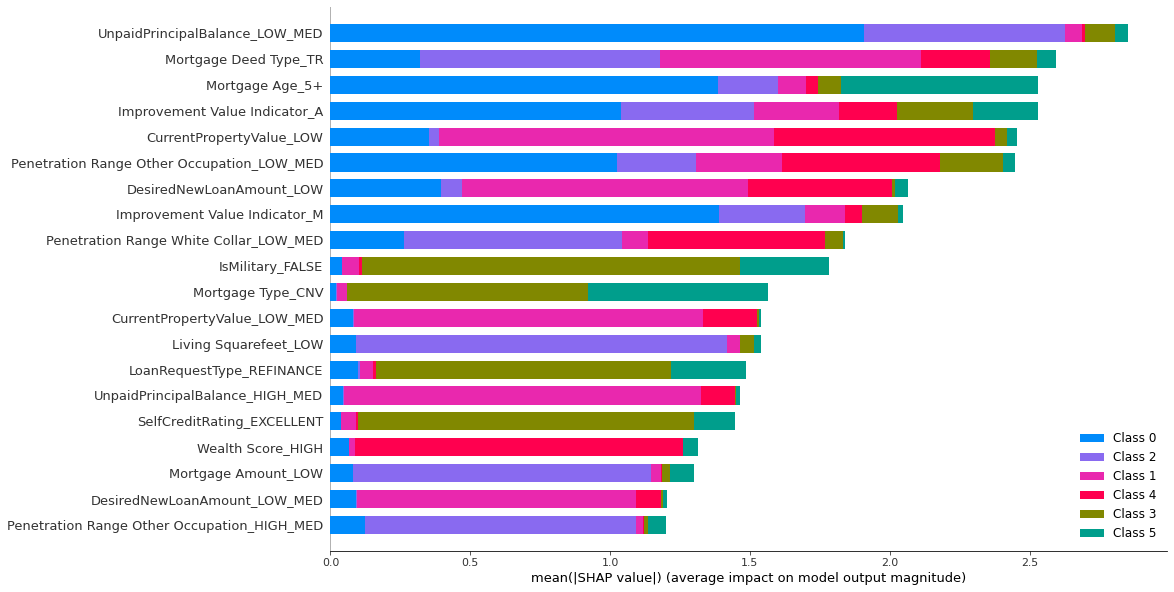

In [ ]:
shap_values_km_5 = explainer_km_5.shap_values(lgbm_X_5_df)
shap.summary_plot(shap_values_km_5, lgbm_X_5_df, plot_type="bar", plot_size=(15, 10))

In [ ]:
df1_lock.shape

(187921, 2)

In [ ]:
df1_lock.head()

,LeadID,Lock
0,148821,0.0
1,148822,0.0
2,148823,0.0
3,148824,0.0
4,148826,0.0


In [ ]:
model_data_cluster_lock = pd.merge(model_data_cluster, df1_lock, how='left',on='LeadID')
model_data_cluster_lock.shape

(187921, 106)

In [ ]:
model_data_cluster_lock.head()

,LeadID,ID Verify Score,Missing,Mortgage Deed Type_MG,Mortgage Deed Type_MO,Mortgage Deed Type_OTHERS,Mortgage Deed Type_SE,Mortgage Deed Type_TR,Mortgage Type_CNV,Mortgage Type_FHA,Mortgage Type_PP or SBA,Mortgage Type_VA,Penetration Range Blue Collar_HIGH,Penetration Range Blue Collar_HIGH_MED,Penetration Range Blue Collar_LOW,Penetration Range Blue Collar_LOW_MED,Penetration Range Other Occupation_HIGH,Penetration Range Other Occupation_HIGH_MED,Penetration Range Other Occupation_LOW,Penetration Range Other Occupation_LOW_MED,Penetration Range White Collar_HIGH,Penetration Range White Collar_HIGH_MED,Penetration Range White Collar_LOW,Penetration Range White Collar_LOW_MED,Percent Range Automobile Owner_HIGH,Percent Range Automobile Owner_HIGH_MED,Percent Range Automobile Owner_LOW,Percent Range Automobile Owner_LOW_MED,Home Market Value_HIGH,Home Market Value_HIGH_MED,Home Market Value_LOW,Home Market Value_LOW_MED,Dwelling Type_M,Dwelling Type_S,Estimated Household Income_HIGH,Estimated Household Income_HIGH_MED,Estimated Household Income_LOW,Estimated Household Income_LOW_MED,Improvement Value Indicator_A,Improvement Value Indicator_M,Improvement Value Indicator_P,Improvement Value Indicator_T,Property Type Indicator_10,Property Type Indicator_ABOVE_10,Absentee Owner Indicator_A,Absentee Owner Indicator_O,Absentee Owner Indicator_S,Absentee Owner Indicator_T or M,Square foot type indicator_B,Square foot type indicator_L,Square foot type indicator_OTHERS,Wealth Score_HIGH,Wealth Score_HIGH_MED,Wealth Score_LOW,Wealth Score_LOW_MED,LoanRequestType_PURCHASE,LoanRequestType_REFINANCE,IsMilitary_FALSE,IsMilitary_TRUE,SelfCreditRating_EXCELLENT,SelfCreditRating_GOOD,SelfCreditRating_LITTLEORNOCREDITHISTORY,SelfCreditRating_MAJORCREDITPROBLEMS,SelfCreditRating_SOMECREDITPROBLEMS,Mortgage Age_1-3 YRS,Mortgage Age_3-5 YRS,Mortgage Age_5+,Mortgage Age_< 1,Loan To Value_HIGH,Loan To Value_HIGH_MED,Loan To Value_LOW,Loan To Value_LOW_MED,Land Squarefeet_HIGH,Land Squarefeet_HIGH_MED,Land Squarefeet_LOW,Land Squarefeet_LOW_MED,DesiredNewLoanAmount_HIGH,DesiredNewLoanAmount_HIGH_MED,DesiredNewLoanAmount_LOW,DesiredNewLoanAmount_LOW_MED,CurrentPropertyValue_HIGH,CurrentPropertyValue_HIGH_MED,CurrentPropertyValue_LOW,CurrentPropertyValue_LOW_MED,UnpaidPrincipalBalance_HIGH,UnpaidPrincipalBalance_HIGH_MED,UnpaidPrincipalBalance_LOW,UnpaidPrincipalBalance_LOW_MED,Mortgage Amount_HIGH,Mortgage Amount_HIGH_MED,Mortgage Amount_LOW,Mortgage Amount_LOW_MED,Mortgage Term_HIGH,Mortgage Term_HIGH_MED,Mortgage Term_LOW,Mortgage Term_LOW_MED,Living Squarefeet_HIGH,Living Squarefeet_HIGH_MED,Living Squarefeet_LOW,Living Squarefeet_LOW_MED,Year Built_HIGH,Year Built_HIGH_MED,Year Built_LOW,Year Built_LOW_MED,cluster,Lock
0,500707,79,NO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0
1,408375,79,NO,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0.0
2,394686,72,NO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [ ]:
model_data_cluster_lock.groupby('cluster')['Lock'].sum()

cluster
0    1035.0
1     328.0
2     502.0
3     788.0
4     159.0
5     202.0
Name: Lock, dtype: float64

In [ ]:
drop_cols = ['LeadID','ID Verify Score','Missing']
X_kc = model_data_cluster_lock.drop(drop_cols,axis=1)
X_kc.shape

(187921, 103)

In [ ]:
X_kc.head()

,Mortgage Deed Type_MG,Mortgage Deed Type_MO,Mortgage Deed Type_OTHERS,Mortgage Deed Type_SE,Mortgage Deed Type_TR,Mortgage Type_CNV,Mortgage Type_FHA,Mortgage Type_PP or SBA,Mortgage Type_VA,Penetration Range Blue Collar_HIGH,Penetration Range Blue Collar_HIGH_MED,Penetration Range Blue Collar_LOW,Penetration Range Blue Collar_LOW_MED,Penetration Range Other Occupation_HIGH,Penetration Range Other Occupation_HIGH_MED,Penetration Range Other Occupation_LOW,Penetration Range Other Occupation_LOW_MED,Penetration Range White Collar_HIGH,Penetration Range White Collar_HIGH_MED,Penetration Range White Collar_LOW,Penetration Range White Collar_LOW_MED,Percent Range Automobile Owner_HIGH,Percent Range Automobile Owner_HIGH_MED,Percent Range Automobile Owner_LOW,Percent Range Automobile Owner_LOW_MED,Home Market Value_HIGH,Home Market Value_HIGH_MED,Home Market Value_LOW,Home Market Value_LOW_MED,Dwelling Type_M,Dwelling Type_S,Estimated Household Income_HIGH,Estimated Household Income_HIGH_MED,Estimated Household Income_LOW,Estimated Household Income_LOW_MED,Improvement Value Indicator_A,Improvement Value Indicator_M,Improvement Value Indicator_P,Improvement Value Indicator_T,Property Type Indicator_10,Property Type Indicator_ABOVE_10,Absentee Owner Indicator_A,Absentee Owner Indicator_O,Absentee Owner Indicator_S,Absentee Owner Indicator_T or M,Square foot type indicator_B,Square foot type indicator_L,Square foot type indicator_OTHERS,Wealth Score_HIGH,Wealth Score_HIGH_MED,Wealth Score_LOW,Wealth Score_LOW_MED,LoanRequestType_PURCHASE,LoanRequestType_REFINANCE,IsMilitary_FALSE,IsMilitary_TRUE,SelfCreditRating_EXCELLENT,SelfCreditRating_GOOD,SelfCreditRating_LITTLEORNOCREDITHISTORY,SelfCreditRating_MAJORCREDITPROBLEMS,SelfCreditRating_SOMECREDITPROBLEMS,Mortgage Age_1-3 YRS,Mortgage Age_3-5 YRS,Mortgage Age_5+,Mortgage Age_< 1,Loan To Value_HIGH,Loan To Value_HIGH_MED,Loan To Value_LOW,Loan To Value_LOW_MED,Land Squarefeet_HIGH,Land Squarefeet_HIGH_MED,Land Squarefeet_LOW,Land Squarefeet_LOW_MED,DesiredNewLoanAmount_HIGH,DesiredNewLoanAmount_HIGH_MED,DesiredNewLoanAmount_LOW,DesiredNewLoanAmount_LOW_MED,CurrentPropertyValue_HIGH,CurrentPropertyValue_HIGH_MED,CurrentPropertyValue_LOW,CurrentPropertyValue_LOW_MED,UnpaidPrincipalBalance_HIGH,UnpaidPrincipalBalance_HIGH_MED,UnpaidPrincipalBalance_LOW,UnpaidPrincipalBalance_LOW_MED,Mortgage Amount_HIGH,Mortgage Amount_HIGH_MED,Mortgage Amount_LOW,Mortgage Amount_LOW_MED,Mortgage Term_HIGH,Mortgage Term_HIGH_MED,Mortgage Term_LOW,Mortgage Term_LOW_MED,Living Squarefeet_HIGH,Living Squarefeet_HIGH_MED,Living Squarefeet_LOW,Living Squarefeet_LOW_MED,Year Built_HIGH,Year Built_HIGH_MED,Year Built_LOW,Year Built_LOW_MED,cluster,Lock
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.

## Finding Optimal 'K' Value using Cao method.

In [ ]:
# Choosing the optimal value for 'K' by comparing cost against each 'K' using 'Cao' method.
def cost_vs_k_plot(X):
    cost = [] 
    for num_clusters in list(range(1,11)):
        print(num_clusters)
        kmode = KModes(n_clusters=num_clusters, init = "Cao", n_jobs = -1, random_state= 42) 
        kmode.fit_predict(X) 
        cost.append(kmode.cost_)
    return cost

In [ ]:
X_kc.shape

(187921, 103)

In [ ]:
cost_kc = cost_vs_k_plot(X_kc)

In [ ]:
cost_kc

[3245657.0,
 3012951.0,
 2891428.0,
 2801713.0,
 2653988.0,
 2617215.0,
 2578866.0,
 2575280.0,
 2543106.0,
 2514287.0]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plotting the cost curve for each K value.
def plotting_cost_k_curve(cost):
    x_axis = np.array([i for i in range(1,11)])
    plt.plot(x_axis,cost)
    plt.title('Cost Vs K')
    plt.xlabel('K')
    plt.ylabel('Cost')
    return plt

<module 'matplotlib.pyplot' from '/opt/python/3.8.1/lib/python3.8/site-packages/matplotlib/pyplot.py'>

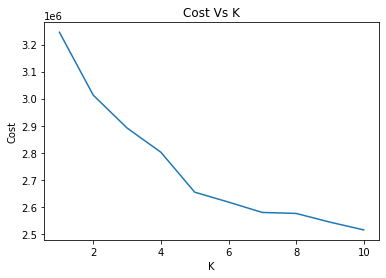

In [ ]:
plotting_cost_k_curve(cost_kc)

In [ ]:
groups_sum = X_kc.groupby('cluster').sum().reset_index()
groups_sum['count'] = groups_sum['cluster'].apply(lambda x: len(X_kc[X_kc['cluster']==x]))
groups_sum

,cluster,Mortgage Deed Type_MG,Mortgage Deed Type_MO,Mortgage Deed Type_OTHERS,Mortgage Deed Type_SE,Mortgage Deed Type_TR,Mortgage Type_CNV,Mortgage Type_FHA,Mortgage Type_PP or SBA,Mortgage Type_VA,Penetration Range Blue Collar_HIGH,Penetration Range Blue Collar_HIGH_MED,Penetration Range Blue Collar_LOW,Penetration Range Blue Collar_LOW_MED,Penetration Range Other Occupation_HIGH,Penetration Range Other Occupation_HIGH_MED,Penetration Range Other Occupation_LOW,Penetration Range Other Occupation_LOW_MED,Penetration Range White Collar_HIGH,Penetration Range White Collar_HIGH_MED,Penetration Range White Collar_LOW,Penetration Range White Collar_LOW_MED,Percent Range Automobile Owner_HIGH,Percent Range Automobile Owner_HIGH_MED,Percent Range Automobile Owner_LOW,Percent Range Automobile Owner_LOW_MED,Home Market Value_HIGH,Home Market Value_HIGH_MED,Home Market Value_LOW,Home Market Value_LOW_MED,Dwelling Type_M,Dwelling Type_S,Estimated Household Income_HIGH,Estimated Household Income_HIGH_MED,Estimated Household Income_LOW,Estimated Household Income_LOW_MED,Improvement Value Indicator_A,Improvement Value Indicator_M,Improvement Value Indicator_P,Improvement Value Indicator_T,Property Type Indicator_10,Property Type Indicator_ABOVE_10,Absentee Owner Indicator_A,Absentee Owner Indicator_O,Absentee Owner Indicator_S,Absentee Owner Indicator_T or M,Square foot type indicator_B,Square foot type indicator_L,Square foot type indicator_OTHERS,Wealth Score_HIGH,Wealth Score_HIGH_MED,Wealth Score_LOW,Wealth Score_LOW_MED,LoanRequestType_PURCHASE,LoanRequestType_REFINANCE,IsMilitary_FALSE,IsMilitary_TRUE,SelfCreditRating_EXCELLENT,SelfCreditRating_GOOD,SelfCreditRating_LITTLEORNOCREDITHISTORY,SelfCreditRating_MAJORCREDITPROBLEMS,SelfCreditRating_SOMECREDITPROBLEMS,Mortgage Age_1-3 YRS,Mortgage Age_3-5 YRS,Mortgage Age_5+,Mortgage Age_< 1,Loan To Value_HIGH,Loan To Value_HIGH_MED,Loan To Value_LOW,Loan To Value_LOW_MED,Land Squarefeet_HIGH,Land Squarefeet_HIGH_MED,Land Squarefeet_LOW,Land Squarefeet_LOW_MED,DesiredNewLoanAmount_HIGH,DesiredNewLoanAmount_HIGH_MED,DesiredNewLoanAmount_LOW,DesiredNewLoanAmount_LOW_MED,CurrentPropertyValue_HIGH,CurrentPropertyValue_HIGH_MED,CurrentPropertyValue_LOW,CurrentPropertyValue_LOW_MED,UnpaidPrincipalBalance_HIGH,UnpaidPrincipalBalance_HIGH_MED,UnpaidPrincipalBalance_LOW,UnpaidPrincipalBalance_LOW_MED,Mortgage Amount_HIGH,Mortgage Amount_HIGH_MED,Mortgage Amount_LOW,Mortgage Amount_LOW_MED,Mortgage Term_HIGH,Mortgage Term_HIGH_MED,Mortgage Term_LOW,Mortgage Term_LOW_MED,Living Squarefeet_HIGH,Living Squarefeet_HIGH_MED,Living Squarefeet_LOW,Living Squarefeet_LOW_MED,Year Built_HIGH,Year Built_HIGH_MED,Year Built_LOW,Year Built_LOW_MED,Lock,count
0,0,25613.0,2070.0,1797.0,4247.0,21704.0,42927.0,8023.0,536.0,3858.0,0.0,2.0,62560.0,2221.0,1101.0,17934.0,431.0,46212.0,15.0,11508.0,6991.0,52249.0,66818.0,3223.0,407.0,386.0,7067.0,12563.0,14000.0,29828.0,5414.0,64289.0,27950.0,27767.0,5879.0,9556.0,17442.0,49671.0,2599.0,1.0,63838.0,5847.0,4132.0,61713.0,2052.0,457.0,1491.0,62827.0,248.0,14236.0,24142.0,8433.0,10814.0,0.0,67230.0,56600.0,16376.0,56219.0,7201.0,15.0,112.0,10450.0,13076.0,13970.0,46163.0,2649.0,10831.0,16033.0,9811.0,15746.0,4158.0,1318.0,58790.0,3371.0,1105.0,1499.0,57587.0,4613.0,2630.0,4103.0,52473.0,14650.0,1586.0,3485.0,4070.0,66512.0,1241.0,4906.0,23219.0,30732.0,42070.0,1502.0,6662.0,2630.0,5506.0,10478.0,23347.0,24185.0,31174.0,18596.0,4523.0,9848.0,1035.0,75858
1,1,7819.0,659.0,665.0,647.0,19077.0,23039.0,3177.0,271.0,2302.0,0.0,2.0,26042.0,561.0,457.0,10814.0,414.0,15421.0,35.0,5158.0,3426.0,21455.0,28018.0,1533.0,322.0,241.0,3397.0,9759.0,2995.0,8330.0,2543.0,27127.0,13353.0,11130.0,2048.0,3738.0,18732.0,12587.0,840.0,0.0,29204.0,2947.0,1673.0,27948.0,1674.0,235.0,729.0,29303.0,60.0,8993.0,10156.0,1830.0,2788.0,0.0,30648.0,25573.0,6569.0,26091.0,3533.0,4.0,54.0,3430.0,9475.0,9097.0,12689.0,2520.0,6622.0,8896.0,4356.0,7207.0,2101.0,606.0,27125.0,1494.0,1404.0,5107.0,1212.0,21440.0

In [ ]:
business_cols = ['Mortgage Deed Type',
                 'Mortgage Type',
                 'Penetration Range Blue Collar',
                 'Penetration Range Other Occupation',
                 'Penetration Range White Collar',
                 'Percent Range Automobile Owner',
                 'Home Market Value',
                 'Dwelling Type',
                 'Estimated Household Income',
                 'Improvement Value Indicator',
                 'Property Type Indicator',
                 'Absentee Owner Indicator',
                 'Square foot type indicator',
                 'Wealth Score',
                 'LoanRequestType',
                 'IsMilitary',
                 'SelfCreditRating',
                 'Loan To Value',
                 'Land Squarefeet',
                 'Living Squarefeet',
                 'DesiredNewLoanAmount',
                 'CurrentPropertyValue',
                 'UnpaidPrincipalBalance',
                 'Mortgage Amount',
                 'Mortgage Term',
                 'Mortgage Age',
                 'Year Built']

In [ ]:
def clustering_hori(sum_numbers):
    final_group_perc = pd.DataFrame()
    final_group_perc = pd.concat([final_group_perc,sum_numbers['cluster']],axis=1)
    for each_col in business_cols:
        ind_col_groups = sum_numbers[[col for col in sum_numbers.columns if each_col  in col]].apply(lambda x: x/x.sum(), axis=1)
        final_group_perc = pd.concat([final_group_perc,ind_col_groups],axis=1)
    final_group_perc = pd.concat([final_group_perc,sum_numbers['Lock']], axis=1)
    return final_group_perc

In [ ]:
groups_perc_hori = clustering_hori(groups_sum)
groups_perc_hori

,cluster,Mortgage Deed Type_MG,Mortgage Deed Type_MO,Mortgage Deed Type_OTHERS,Mortgage Deed Type_SE,Mortgage Deed Type_TR,Mortgage Type_CNV,Mortgage Type_FHA,Mortgage Type_PP or SBA,Mortgage Type_VA,Penetration Range Blue Collar_HIGH,Penetration Range Blue Collar_HIGH_MED,Penetration Range Blue Collar_LOW,Penetration Range Blue Collar_LOW_MED,Penetration Range Other Occupation_HIGH,Penetration Range Other Occupation_HIGH_MED,Penetration Range Other Occupation_LOW,Penetration Range Other Occupation_LOW_MED,Penetration Range White Collar_HIGH,Penetration Range White Collar_HIGH_MED,Penetration Range White Collar_LOW,Penetration Range White Collar_LOW_MED,Percent Range Automobile Owner_HIGH,Percent Range Automobile Owner_HIGH_MED,Percent Range Automobile Owner_LOW,Percent Range Automobile Owner_LOW_MED,Home Market Value_HIGH,Home Market Value_HIGH_MED,Home Market Value_LOW,Home Market Value_LOW_MED,Dwelling Type_M,Dwelling Type_S,Estimated Household Income_HIGH,Estimated Household Income_HIGH_MED,Estimated Household Income_LOW,Estimated Household Income_LOW_MED,Improvement Value Indicator_A,Improvement Value Indicator_M,Improvement Value Indicator_P,Improvement Value Indicator_T,Property Type Indicator_10,Property Type Indicator_ABOVE_10,Absentee Owner Indicator_A,Absentee Owner Indicator_O,Absentee Owner Indicator_S,Absentee Owner Indicator_T or M,Square foot type indicator_B,Square foot type indicator_L,Square foot type indicator_OTHERS,Wealth Score_HIGH,Wealth Score_HIGH_MED,Wealth Score_LOW,Wealth Score_LOW_MED,LoanRequestType_PURCHASE,LoanRequestType_REFINANCE,IsMilitary_FALSE,IsMilitary_TRUE,SelfCreditRating_EXCELLENT,SelfCreditRating_GOOD,SelfCreditRating_LITTLEORNOCREDITHISTORY,SelfCreditRating_MAJORCREDITPROBLEMS,SelfCreditRating_SOMECREDITPROBLEMS,Loan To Value_HIGH,Loan To Value_HIGH_MED,Loan To Value_LOW,Loan To Value_LOW_MED,Land Squarefeet_HIGH,Land Squarefeet_HIGH_MED,Land Squarefeet_LOW,Land Squarefeet_LOW_MED,Living Squarefeet_HIGH,Living Squarefeet_HIGH_MED,Living Squarefeet_LOW,Living Squarefeet_LOW_MED,DesiredNewLoanAmount_HIGH,DesiredNewLoanAmount_HIGH_MED,DesiredNewLoanAmount_LOW,DesiredNewLoanAmount_LOW_MED,CurrentPropertyValue_HIGH,CurrentPropertyValue_HIGH_MED,CurrentPropertyValue_LOW,CurrentPropertyValue_LOW_MED,UnpaidPrincipalBalance_HIGH,UnpaidPrincipalBalance_HIGH_MED,UnpaidPrincipalBalance_LOW,UnpaidPrincipalBalance_LOW_MED,Mortgage Amount_HIGH,Mortgage Amount_HIGH_MED,Mortgage Amount_LOW,Mortgage Amount_LOW_MED,Mortgage Term_HIGH,Mortgage Term_HIGH_MED,Mortgage Term_LOW,Mortgage Term_LOW_MED,Mortgage Age_1-3 YRS,Mortgage Age_3-5 YRS,Mortgage Age_5+,Mortgage Age_< 1,Year Built_HIGH,Year Built_HIGH_MED,Year Built_LOW,Year Built_LOW_MED,Lock
0,0,0.462070,0.037344,0.032419,0.076618,0.391550,0.775640,0.144966,0.009685,0.069709,0.000000,0.000031,0.965685,0.034284,0.016764,0.273059,0.006562,0.703615,0.000212,0.162627,0.098795,0.738366,0.943304,0.045501,0.005746,0.005449,0.111365,0.197973,0.220618,0.470043,0.077672,0.922328,0.392821,0.390249,0.082626,0.134304,0.250197,0.712507,0.037281,0.000014,0.916094,0.083906,0.060450,0.902844,0.030020,0.006686,0.023093,0.973066,0.003841,0.247046,0.418950,0.146343,0.187662,0.000000,1.000000,0.775597,0.224403,0.759747,0.097315,0.000203,0.001514,0.141222,0.206616,0.305851,0.187158,0.300376,0.061475,0.019486,0.869199,0.049840,0.086687,0.164966,0.367577,0.380770,0.017051,0.023131,0.888633,0.071184,0.035610,0.055554,0.710477,0.198359,0.020964,0.046066,0.053798,0.879172,0.020650,0.081633,0.386352,0.511365,0.795816,0.028413,0.126021,0.049750,0.172375,0.184160,0.608545,0.034921,0.486023,0.289924,0.070517,0.153537,1035.0
1,1,0.270863,0.022829,0.023037,0.022413,0.660858,0.800271,0.110355,0.009413,0.079961,0.000000,0.000075,0.978839,0.021086,0.016860,0.398952,0.015273,0.568915,0.001164,0.171510,0.113919,0.713407,0.930398,0.050907,0.010693,0.008003,0.138761,0.398636,0.122340,0.340264,0.085709,0.914291,0.441144,0.367703,0.067660,0.123493,0.582481,0.391399,0.026120,0.000000,0.908339,

In [ ]:
groups_perc_hori.shape

(6, 103)

In [ ]:
groups_perc_hori['count'] = groups_perc_hori['cluster'].apply(lambda x: len(X_kc[X_kc['cluster']==x]))

groups_perc_hori['count_perc'] = groups_perc_hori['count']/(groups_perc_hori['count'].sum()) 

groups_perc_hori['Lock'] = groups_perc_hori['Lock']/groups_perc_hori['count'] 

groups_perc_hori

,cluster,Mortgage Deed Type_MG,Mortgage Deed Type_MO,Mortgage Deed Type_OTHERS,Mortgage Deed Type_SE,Mortgage Deed Type_TR,Mortgage Type_CNV,Mortgage Type_FHA,Mortgage Type_PP or SBA,Mortgage Type_VA,Penetration Range Blue Collar_HIGH,Penetration Range Blue Collar_HIGH_MED,Penetration Range Blue Collar_LOW,Penetration Range Blue Collar_LOW_MED,Penetration Range Other Occupation_HIGH,Penetration Range Other Occupation_HIGH_MED,Penetration Range Other Occupation_LOW,Penetration Range Other Occupation_LOW_MED,Penetration Range White Collar_HIGH,Penetration Range White Collar_HIGH_MED,Penetration Range White Collar_LOW,Penetration Range White Collar_LOW_MED,Percent Range Automobile Owner_HIGH,Percent Range Automobile Owner_HIGH_MED,Percent Range Automobile Owner_LOW,Percent Range Automobile Owner_LOW_MED,Home Market Value_HIGH,Home Market Value_HIGH_MED,Home Market Value_LOW,Home Market Value_LOW_MED,Dwelling Type_M,Dwelling Type_S,Estimated Household Income_HIGH,Estimated Household Income_HIGH_MED,Estimated Household Income_LOW,Estimated Household Income_LOW_MED,Improvement Value Indicator_A,Improvement Value Indicator_M,Improvement Value Indicator_P,Improvement Value Indicator_T,Property Type Indicator_10,Property Type Indicator_ABOVE_10,Absentee Owner Indicator_A,Absentee Owner Indicator_O,Absentee Owner Indicator_S,Absentee Owner Indicator_T or M,Square foot type indicator_B,Square foot type indicator_L,Square foot type indicator_OTHERS,Wealth Score_HIGH,Wealth Score_HIGH_MED,Wealth Score_LOW,Wealth Score_LOW_MED,LoanRequestType_PURCHASE,LoanRequestType_REFINANCE,IsMilitary_FALSE,IsMilitary_TRUE,SelfCreditRating_EXCELLENT,SelfCreditRating_GOOD,SelfCreditRating_LITTLEORNOCREDITHISTORY,SelfCreditRating_MAJORCREDITPROBLEMS,SelfCreditRating_SOMECREDITPROBLEMS,Loan To Value_HIGH,Loan To Value_HIGH_MED,Loan To Value_LOW,Loan To Value_LOW_MED,Land Squarefeet_HIGH,Land Squarefeet_HIGH_MED,Land Squarefeet_LOW,Land Squarefeet_LOW_MED,Living Squarefeet_HIGH,Living Squarefeet_HIGH_MED,Living Squarefeet_LOW,Living Squarefeet_LOW_MED,DesiredNewLoanAmount_HIGH,DesiredNewLoanAmount_HIGH_MED,DesiredNewLoanAmount_LOW,DesiredNewLoanAmount_LOW_MED,CurrentPropertyValue_HIGH,CurrentPropertyValue_HIGH_MED,CurrentPropertyValue_LOW,CurrentPropertyValue_LOW_MED,UnpaidPrincipalBalance_HIGH,UnpaidPrincipalBalance_HIGH_MED,UnpaidPrincipalBalance_LOW,UnpaidPrincipalBalance_LOW_MED,Mortgage Amount_HIGH,Mortgage Amount_HIGH_MED,Mortgage Amount_LOW,Mortgage Amount_LOW_MED,Mortgage Term_HIGH,Mortgage Term_HIGH_MED,Mortgage Term_LOW,Mortgage Term_LOW_MED,Mortgage Age_1-3 YRS,Mortgage Age_3-5 YRS,Mortgage Age_5+,Mortgage Age_< 1,Year Built_HIGH,Year Built_HIGH_MED,Year Built_LOW,Year Built_LOW_MED,Lock,count,count_perc
0,0,0.462070,0.037344,0.032419,0.076618,0.391550,0.775640,0.144966,0.009685,0.069709,0.000000,0.000031,0.965685,0.034284,0.016764,0.273059,0.006562,0.703615,0.000212,0.162627,0.098795,0.738366,0.943304,0.045501,0.005746,0.005449,0.111365,0.197973,0.220618,0.470043,0.077672,0.922328,0.392821,0.390249,0.082626,0.134304,0.250197,0.712507,0.037281,0.000014,0.916094,0.083906,0.060450,0.902844,0.030020,0.006686,0.023093,0.973066,0.003841,0.247046,0.418950,0.146343,0.187662,0.000000,1.000000,0.775597,0.224403,0.759747,0.097315,0.000203,0.001514,0.141222,0.206616,0.305851,0.187158,0.300376,0.061475,0.019486,0.869199,0.049840,0.086687,0.164966,0.367577,0.380770,0.017051,0.023131,0.888633,0.071184,0.035610,0.055554,0.710477,0.198359,0.020964,0.046066,0.053798,0.879172,0.020650,0.081633,0.386352,0.511365,0.795816,0.028413,0.126021,0.049750,0.172375,0.184160,0.608545,0.034921,0.486023,0.289924,0.070517,0.153537,0.013644,75858,0.403670
1,1,0.270863,0.022829,0.023037,0.022413,0.660858,0.800271,0.110355,0.009413,0.079961,0.000000,0.000075,0.978839,0.021086,0.016860,0.398952,0.015273,0.568915,0.001164,0.171510,0.113919,0.713407,0.930398,0.050907,0.010693,0.008003,0.138761,0.398636,0.122340,0.340264,0.085709,0.914291,0.441144,0.367703,0.067660,0.123493,0.582481,0.

In [ ]:
groups_sum

,cluster,Mortgage Deed Type_MG,Mortgage Deed Type_MO,Mortgage Deed Type_OTHERS,Mortgage Deed Type_SE,Mortgage Deed Type_TR,Mortgage Type_CNV,Mortgage Type_FHA,Mortgage Type_PP or SBA,Mortgage Type_VA,Penetration Range Blue Collar_HIGH,Penetration Range Blue Collar_HIGH_MED,Penetration Range Blue Collar_LOW,Penetration Range Blue Collar_LOW_MED,Penetration Range Other Occupation_HIGH,Penetration Range Other Occupation_HIGH_MED,Penetration Range Other Occupation_LOW,Penetration Range Other Occupation_LOW_MED,Penetration Range White Collar_HIGH,Penetration Range White Collar_HIGH_MED,Penetration Range White Collar_LOW,Penetration Range White Collar_LOW_MED,Percent Range Automobile Owner_HIGH,Percent Range Automobile Owner_HIGH_MED,Percent Range Automobile Owner_LOW,Percent Range Automobile Owner_LOW_MED,Home Market Value_HIGH,Home Market Value_HIGH_MED,Home Market Value_LOW,Home Market Value_LOW_MED,Dwelling Type_M,Dwelling Type_S,Estimated Household Income_HIGH,Estimated Household Income_HIGH_MED,Estimated Household Income_LOW,Estimated Household Income_LOW_MED,Improvement Value Indicator_A,Improvement Value Indicator_M,Improvement Value Indicator_P,Improvement Value Indicator_T,Property Type Indicator_10,Property Type Indicator_ABOVE_10,Absentee Owner Indicator_A,Absentee Owner Indicator_O,Absentee Owner Indicator_S,Absentee Owner Indicator_T or M,Square foot type indicator_B,Square foot type indicator_L,Square foot type indicator_OTHERS,Wealth Score_HIGH,Wealth Score_HIGH_MED,Wealth Score_LOW,Wealth Score_LOW_MED,LoanRequestType_PURCHASE,LoanRequestType_REFINANCE,IsMilitary_FALSE,IsMilitary_TRUE,SelfCreditRating_EXCELLENT,SelfCreditRating_GOOD,SelfCreditRating_LITTLEORNOCREDITHISTORY,SelfCreditRating_MAJORCREDITPROBLEMS,SelfCreditRating_SOMECREDITPROBLEMS,Mortgage Age_1-3 YRS,Mortgage Age_3-5 YRS,Mortgage Age_5+,Mortgage Age_< 1,Loan To Value_HIGH,Loan To Value_HIGH_MED,Loan To Value_LOW,Loan To Value_LOW_MED,Land Squarefeet_HIGH,Land Squarefeet_HIGH_MED,Land Squarefeet_LOW,Land Squarefeet_LOW_MED,DesiredNewLoanAmount_HIGH,DesiredNewLoanAmount_HIGH_MED,DesiredNewLoanAmount_LOW,DesiredNewLoanAmount_LOW_MED,CurrentPropertyValue_HIGH,CurrentPropertyValue_HIGH_MED,CurrentPropertyValue_LOW,CurrentPropertyValue_LOW_MED,UnpaidPrincipalBalance_HIGH,UnpaidPrincipalBalance_HIGH_MED,UnpaidPrincipalBalance_LOW,UnpaidPrincipalBalance_LOW_MED,Mortgage Amount_HIGH,Mortgage Amount_HIGH_MED,Mortgage Amount_LOW,Mortgage Amount_LOW_MED,Mortgage Term_HIGH,Mortgage Term_HIGH_MED,Mortgage Term_LOW,Mortgage Term_LOW_MED,Living Squarefeet_HIGH,Living Squarefeet_HIGH_MED,Living Squarefeet_LOW,Living Squarefeet_LOW_MED,Year Built_HIGH,Year Built_HIGH_MED,Year Built_LOW,Year Built_LOW_MED,Lock,count
0,0,25613.0,2070.0,1797.0,4247.0,21704.0,42927.0,8023.0,536.0,3858.0,0.0,2.0,62560.0,2221.0,1101.0,17934.0,431.0,46212.0,15.0,11508.0,6991.0,52249.0,66818.0,3223.0,407.0,386.0,7067.0,12563.0,14000.0,29828.0,5414.0,64289.0,27950.0,27767.0,5879.0,9556.0,17442.0,49671.0,2599.0,1.0,63838.0,5847.0,4132.0,61713.0,2052.0,457.0,1491.0,62827.0,248.0,14236.0,24142.0,8433.0,10814.0,0.0,67230.0,56600.0,16376.0,56219.0,7201.0,15.0,112.0,10450.0,13076.0,13970.0,46163.0,2649.0,10831.0,16033.0,9811.0,15746.0,4158.0,1318.0,58790.0,3371.0,1105.0,1499.0,57587.0,4613.0,2630.0,4103.0,52473.0,14650.0,1586.0,3485.0,4070.0,66512.0,1241.0,4906.0,23219.0,30732.0,42070.0,1502.0,6662.0,2630.0,5506.0,10478.0,23347.0,24185.0,31174.0,18596.0,4523.0,9848.0,1035.0,75858
1,1,7819.0,659.0,665.0,647.0,19077.0,23039.0,3177.0,271.0,2302.0,0.0,2.0,26042.0,561.0,457.0,10814.0,414.0,15421.0,35.0,5158.0,3426.0,21455.0,28018.0,1533.0,322.0,241.0,3397.0,9759.0,2995.0,8330.0,2543.0,27127.0,13353.0,11130.0,2048.0,3738.0,18732.0,12587.0,840.0,0.0,29204.0,2947.0,1673.0,27948.0,1674.0,235.0,729.0,29303.0,60.0,8993.0,10156.0,1830.0,2788.0,0.0,30648.0,25573.0,6569.0,26091.0,3533.0,4.0,54.0,3430.0,9475.0,9097.0,12689.0,2520.0,6622.0,8896.0,4356.0,7207.0,2101.0,606.0,27125.0,1494.0,1404.0,5107.0,1212.0,21440.0

In [ ]:
# # Create a new excel workbook
writer = pd.ExcelWriter('BM_Clustering_Interpretation_'+ str(date.today())+'5_Cluster'+'.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
groups_sum.to_excel(writer, sheet_name='Clustering',index=False)

In [ ]:
# Vertically
#Find Fraction of each row with total
def clustering_verc(sum_numbers):
    for col in sum_numbers.columns:
        if col == 'cluster':
            sum_numbers[col] = sum_numbers[col]
        else:
            sum_numbers[col] = sum_numbers[col]/sum_numbers[col].sum(axis=0)
    return sum_numbers

In [ ]:
groups_perc_verc = clustering_verc(groups_sum)
groups_perc_verc['count'] = groups_perc_verc['cluster'].apply(lambda x: len(X_kc[X_kc['cluster']==x]))
groups_perc_verc

,cluster,Mortgage Deed Type_MG,Mortgage Deed Type_MO,Mortgage Deed Type_OTHERS,Mortgage Deed Type_SE,Mortgage Deed Type_TR,Mortgage Type_CNV,Mortgage Type_FHA,Mortgage Type_PP or SBA,Mortgage Type_VA,Penetration Range Blue Collar_HIGH,Penetration Range Blue Collar_HIGH_MED,Penetration Range Blue Collar_LOW,Penetration Range Blue Collar_LOW_MED,Penetration Range Other Occupation_HIGH,Penetration Range Other Occupation_HIGH_MED,Penetration Range Other Occupation_LOW,Penetration Range Other Occupation_LOW_MED,Penetration Range White Collar_HIGH,Penetration Range White Collar_HIGH_MED,Penetration Range White Collar_LOW,Penetration Range White Collar_LOW_MED,Percent Range Automobile Owner_HIGH,Percent Range Automobile Owner_HIGH_MED,Percent Range Automobile Owner_LOW,Percent Range Automobile Owner_LOW_MED,Home Market Value_HIGH,Home Market Value_HIGH_MED,Home Market Value_LOW,Home Market Value_LOW_MED,Dwelling Type_M,Dwelling Type_S,Estimated Household Income_HIGH,Estimated Household Income_HIGH_MED,Estimated Household Income_LOW,Estimated Household Income_LOW_MED,Improvement Value Indicator_A,Improvement Value Indicator_M,Improvement Value Indicator_P,Improvement Value Indicator_T,Property Type Indicator_10,Property Type Indicator_ABOVE_10,Absentee Owner Indicator_A,Absentee Owner Indicator_O,Absentee Owner Indicator_S,Absentee Owner Indicator_T or M,Square foot type indicator_B,Square foot type indicator_L,Square foot type indicator_OTHERS,Wealth Score_HIGH,Wealth Score_HIGH_MED,Wealth Score_LOW,Wealth Score_LOW_MED,LoanRequestType_PURCHASE,LoanRequestType_REFINANCE,IsMilitary_FALSE,IsMilitary_TRUE,SelfCreditRating_EXCELLENT,SelfCreditRating_GOOD,SelfCreditRating_LITTLEORNOCREDITHISTORY,SelfCreditRating_MAJORCREDITPROBLEMS,SelfCreditRating_SOMECREDITPROBLEMS,Mortgage Age_1-3 YRS,Mortgage Age_3-5 YRS,Mortgage Age_5+,Mortgage Age_< 1,Loan To Value_HIGH,Loan To Value_HIGH_MED,Loan To Value_LOW,Loan To Value_LOW_MED,Land Squarefeet_HIGH,Land Squarefeet_HIGH_MED,Land Squarefeet_LOW,Land Squarefeet_LOW_MED,DesiredNewLoanAmount_HIGH,DesiredNewLoanAmount_HIGH_MED,DesiredNewLoanAmount_LOW,DesiredNewLoanAmount_LOW_MED,CurrentPropertyValue_HIGH,CurrentPropertyValue_HIGH_MED,CurrentPropertyValue_LOW,CurrentPropertyValue_LOW_MED,UnpaidPrincipalBalance_HIGH,UnpaidPrincipalBalance_HIGH_MED,UnpaidPrincipalBalance_LOW,UnpaidPrincipalBalance_LOW_MED,Mortgage Amount_HIGH,Mortgage Amount_HIGH_MED,Mortgage Amount_LOW,Mortgage Amount_LOW_MED,Mortgage Term_HIGH,Mortgage Term_HIGH_MED,Mortgage Term_LOW,Mortgage Term_LOW_MED,Living Squarefeet_HIGH,Living Squarefeet_HIGH_MED,Living Squarefeet_LOW,Living Squarefeet_LOW_MED,Year Built_HIGH,Year Built_HIGH_MED,Year Built_LOW,Year Built_LOW_MED,Lock,count
0,0,0.484553,0.464334,0.439472,0.646325,0.291028,0.398043,0.404997,0.349641,0.296245,0.0,0.250,0.432603,0.507078,0.417520,0.315462,0.280416,0.509223,0.091463,0.370747,0.289530,0.478037,0.435597,0.372343,0.267939,0.301563,0.319153,0.373243,0.484345,0.537722,0.426736,0.429464,0.420946,0.420228,0.459440,0.462760,0.219344,0.595804,0.461634,1.0,0.415959,0.390242,0.448789,0.415321,0.325250,0.399476,0.409166,0.412215,0.551111,0.320985,0.483779,0.482768,0.480110,0.0,0.458423,0.455229,0.449039,0.450047,0.437511,0.60,0.455285,0.467499,0.319044,0.330690,0.484305,0.282620,0.347827,0.384088,0.400825,0.424420,0.408288,0.427229,0.412194,0.420377,0.079376,0.102545,0.586754,0.141044,0.159791,0.232386,0.528812,0.300359,0.071973,0.099330,0.139978,0.660057,0.071048,0.212795,0.428071,0.538723,0.385292,0.406056,0.422314,0.434639,0.297944,0.409025,0.387521,0.486111,0.452906,0.436680,0.304477,0.360508,0.343397,75858
1,1,0.147922,0.147824,0.162631,0.098463,0.255803,0.213631,0.160374,0.176778,0.176764,0.0,0.250,0.180081,0.128082,0.173303,0.190220,0.269356,0.169928,0.213415,0.166173,0.141887,0.196296,0.182654,0.177103,0.211982,0.188281,0.153412,0.289937,0.103615,0.150169,0.200441,0.181214,0.201105,0.168442,0.160050,0.181017,0.235566,0.150981,0.149201,0.0,0.190289,0.196690,0.181710,0.1

In [ ]:
groups_perc_hori.to_excel(writer, sheet_name='Clustering_Hori',index=False)
groups_perc_verc.to_excel(writer, sheet_name='Clustering_Verc',index=False)


## Pickle file creation

In [ ]:
import pickle
filename = 'BM_Clustering_Preprocess_Model_Pipeline_Rerun_5_Clusters.pkl'
pickle.dump(data_preprocess_model_pipeline, open(filename, 'wb'))

In [ ]:
test_data.head()

,LeadID,ID Verify Score,Mortgage Deed Type,Mortgage Type,Penetration Range Blue Collar,Penetration Range Other Occupation,Penetration Range White Collar,Percent Range Automobile Owner,Home Market Value,Dwelling Type,Estimated Household Income,Loan To Value,Land Squarefeet,Improvement Value Indicator,Property Type Indicator,Absentee Owner Indicator,Square foot type indicator,Wealth Score,Year Built,DesiredNewLoanAmount,CurrentPropertyValue,LoanRequestType,IsMilitary,SelfCreditRating,UnpaidPrincipalBalance,Mortgage Amount,Mortgage Term,Living Squarefeet,LeadDate,Mortgage Date,Mortgage Age
0,500707,79,MG,CNV,LOW,LOW_MED,HIGH_MED,HIGH,LOW_MED,S,HIGH_MED,50.0,10325.0,M,10,O,L,UNKNOWN,1981.0,130000.0,325000.0,REFINANCE,FALSE,EXCELLENT,130000.0,167600.0,20.0,2065.0,2021-06-19,2016-05-23,3-5 YRS
1,408375,79,MG,CNV,LOW,LOW_MED,HIGH_MED,HIGH_MED,UNKNOWN,M,HIGH_MED,61.0,9126.0,P,10,O,L,UNKNOWN,1996.0,150000.0,275000.0,REFINANCE,FALSE,EXCELLENT,150000.0,161600.0,30.0,1791.0,2021-02-01,2020-07-23,< 1
2,394686,72,UNKNOWN,CNV,UNKNOWN,UNKNOWN,LOW_MED,HIGH,HIGH_MED,S,HIGH,82.0,47480.0,A,10,O,L,HIGH,1980.0,160000.0,350000.0,REFINANCE,FALSE,SOMECREDITPROBLEMS,160000.0,239000.0,30.0,2256.0,2021-01-16,2003-11-20,5+
3,238278,81,TR,CNV,LOW,LOW_MED,HIGH_MED,HIGH,LOW,S,HIGH,59.0,44.0,A,ABOVE_10,O,L,HIGH_MED,1985.0,270000.0,300000.0,REFINANCE,FALSE,EXCELLENT,270000.0,164500.0,30.0,1381.0,2020-05-20,2017-08-24,1-3 YRS
4,387004,69,MG,CNV,LOW,HIGH_MED,LOW_MED,HIGH,LOW_MED,S,LOW_MED,90.0,25265.0,M,10,O,L,HIGH_MED,1986.0,140000.0,250000.0,REFINANCE,FALSE,EXCELLENT,140000.0,156000.0,30.0,1661.0,2021-01-07,2018-07-20,1-3 YRS


In [ ]:
# Testing
# some time later...
# load the model from disk
import pickle
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.transform(test_data)
print(result.head())

   LeadID  cluster
0  398865        5
1  510043        5
2  477336        5
3  384924        5
4  161983        5


In [ ]:
df1_lock.head()

,LeadID,Lock
0,148821,0.0
1,148822,0.0
2,148823,0.0
3,148824,0.0
4,148826,0.0


In [ ]:
result.shape, df1_lock.shape

((187921, 2), (187921, 2))

In [ ]:
test_data_cluster_output = pd.merge(df1_lock, result, on='LeadID', how='inner')
test_data_cluster_output.shape

(187921, 3)

In [ ]:
test_data_cluster_output.head()

,LeadID,Lock,cluster
0,148821,0.0,3
1,148822,0.0,1
2,148823,0.0,1
3,148824,0.0,2
4,148826,0.0,1


In [ ]:
test_data_cluster_output.to_csv('BM_Clustering_Output'+ '_' + str(date.today())+'5_Cluster'+'.csv',index=False)

## Numerical Variables Bin Ranges

In [ ]:
df_copy_bin.shape

(187921, 30)

In [ ]:
bin_creation_pipeline = Pipeline(steps=[('ColumnTypeChange_Imputation', ColumnTypeChange_Imputation(num_cols, cat_cols,'LeadDate','Mortgage Date')),
                                 ('Categorical_Preprocess_Functions', Categorical_Preprocess_Functions(range_cols,
                                                                                                       wealth_income_cols,
                                                                                                       'Home Market Value', 
                                                                                                       'Mortgage Deed Type',
                                                                                                       'Mortgage Type',
                                                                                                       'Absentee Owner Indicator',
                                                                                                       'SelfCreditRating',
                                                                                                       'Square foot type indicator',
                                                                                                       'Property Type Indicator')),
                                 ('Numerical_Outlier_Preprocess', Numerical_Outlier_Preprocess(num_cols))
                                 ])


preprocess_data = bin_creation_pipeline.fit_transform(df_copy_bin)
preprocess_data.shape

(187921, 31)

In [ ]:
preprocess_data.head()

,LeadID,ID Verify Score,Mortgage Deed Type,Mortgage Type,Penetration Range Blue Collar,Penetration Range Other Occupation,Penetration Range White Collar,Percent Range Automobile Owner,Home Market Value,Dwelling Type,Estimated Household Income,Loan To Value,Land Squarefeet,Improvement Value Indicator,Property Type Indicator,Absentee Owner Indicator,Square foot type indicator,Wealth Score,Year Built,DesiredNewLoanAmount,CurrentPropertyValue,LoanRequestType,IsMilitary,SelfCreditRating,UnpaidPrincipalBalance,Mortgage Amount,Mortgage Term,Living Squarefeet,LeadDate,Mortgage Date,Mortgage Age
0,500707,79,MG,CNV,LOW,LOW_MED,HIGH_MED,HIGH,LOW_MED,S,HIGH_MED,50.0,10325.0,M,10,O,L,UNKNOWN,1981.0,130000.0,325000.0,REFINANCE,FALSE,EXCELLENT,130000.0,167600.0,20.0,2065.0,2021-06-19,2016-05-23,3-5 YRS
1,408375,79,MG,CNV,LOW,LOW_MED,HIGH_MED,HIGH_MED,UNKNOWN,M,HIGH_MED,61.0,9126.0,P,10,O,L,UNKNOWN,1996.0,150000.0,275000.0,REFINANCE,FALSE,EXCELLENT,150000.0,161600.0,30.0,1791.0,2021-02-01,2020-07-23,< 1
2,394686,72,UNKNOWN,CNV,UNKNOWN,UNKNOWN,LOW_MED,HIGH,HIGH_MED,S,HIGH,82.0,47480.0,A,10,O,L,HIGH,1980.0,160000.0,350000.0,REFINANCE,FALSE,SOMECREDITPROBLEMS,160000.0,239000.0,30.0,2256.0,2021-01-16,2003-11-20,5+
3,238278,81,TR,CNV,LOW,LOW_MED,HIGH_MED,HIGH,LOW,S,HIGH,59.0,2788.0,A,ABOVE_10,O,L,HIGH_MED,1985.0,270000.0,300000.0,REFINANCE,FALSE,EXCELLENT,270000.0,164500.0,30.0,1381.0,2020-05-20,2017-08-24,1-3 YRS
4,387004,69,MG,CNV,LOW,HIGH_MED,LOW_MED,HIGH,LOW_MED,S,LOW_MED,90.0,25265.0,M,10,O,L,HIGH_MED,1986.0,140000.0,250000.0,REFINANCE,FALSE,EXCELLENT,140000.0,156000.0,30.0,1661.0,2021-01-07,2018-07-20,1-3 YRS


In [ ]:
def bin_values(preprocess_data,numerical_preprocess_cols):
    bins_dict = {}
    for col in numerical_preprocess_cols:
        col_intervals = np.round(pd.cut(preprocess_data[col], bins= 4, retbins = True)[1],2)
        bins_dict[col] = list(col_intervals)
    return bins_dict

In [ ]:
bin_data = bin_values(preprocess_data, num_cols)
bin_data

{'Loan To Value': [30.93, 49.5, 68.0, 86.5, 105.0],
 'Land Squarefeet': [2572.99, 56541.0, 110294.0, 164047.0, 217800.0],
 'DesiredNewLoanAmount': [120661.0, 205750.0, 290500.0, 375250.0, 460000.0],
 'CurrentPropertyValue': [149250.0, 337500.0, 525000.0, 712500.0, 900000.0],
 'UnpaidPrincipalBalance': [-410.0, 102500.0, 205000.0, 307500.0, 410000.0],
 'Mortgage Amount': [59618.15, 155462.25, 250924.5, 346386.75, 441849.0],
 'Mortgage Term': [14.98, 18.75, 22.5, 26.25, 30.0],
 'Living Squarefeet': [1037.28, 1720.25, 2400.5, 3080.75, 3761.0],
 'Year Built': [1925.91, 1948.25, 1970.5, 1992.75, 2015.0]}

In [ ]:
bin_data_df = pd.DataFrame(bin_data.items(), columns=['column', 'bin_values'])
bin_data_df

,column,bin_values
0,Loan To Value,"[30.93, 49.5, 68.0, 86.5, 105.0]"
1,Land Squarefeet,"[2572.99, 56541.0, 110294.0, 164047.0, 217800.0]"
2,DesiredNewLoanAmount,"[120661.0, 205750.0, 290500.0, 375250.0, 46000..."
3,CurrentPropertyValue,"[149250.0, 337500.0, 525000.0, 712500.0, 90000..."
4,UnpaidPrincipalBalance,"[-410.0, 102500.0, 205000.0, 307500.0, 410000.0]"
5,Mortgage Amount,"[59618.15, 155462.25, 250924.5, 346386.75, 441..."
6,Mortgage Term,"[14.98, 18.75, 22.5, 26.25, 30.0]"
7,Living Squarefeet,"[1037.28, 1720.25, 2400.5, 3080.75, 3761.0]"
8,Year Built,"[1925.91, 1948.25, 1970.5, 1992.75, 2015.0]"


In [ ]:
bin_data_df.to_excel(writer, sheet_name='column_bin_values',index=False)

writer.save()

## END 